### Problem Statement

To reduce customer churn, the telecom companie needs to predict which customers are at high risk of churn. churn prediction is usually more critical (and non-trivial) for prepaid customers. In this project, you will use the usage-based definition to define churn. 

**Usage-based churn:** Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.



#### Loading Packages

In [1]:
# Loading Data Analysis packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)


# Loading Scikit-Learn packages for modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score


import warnings
warnings.filterwarnings("ignore")

#### Loading data

In [2]:
# Reading data set
churn = pd.read_csv("telecom_churn_data.csv")
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
# General Information
print(churn.dtypes)

print(churn.info())

print(churn.shape)

mobile_number                 int64
circle_id                     int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6         object
last_date_of_month_7         object
last_date_of_month_8         object
last_date_of_month_9         object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               

In [4]:
# Dropping phone number column as we dont need for the analysis or modeling
# churn.drop("mobile_number", axis = 1, inplace = True)
churn.set_index("mobile_number", inplace= True)

In [5]:
churn.describe()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.

Dropping all the columns as these columns have only one value present in all the rows and will not be useful for the analysis.

In [6]:
# Dropiing all these columns as these are not useful for the analysis.
churn.drop(['circle_id'], axis = 1, inplace = True)

# 1. Missing value treatment

In [7]:
# Checking for missing values
print(round(100 * (churn.isnull().sum() / len(churn)), 2))

loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou_6             3.94
loc_og_t2t_mou_7             3.86
loc_og_t2t_mou

In [8]:
# Checking for the columns where missing value is more than 70%
high_missing_cols = churn.columns[(churn.isnull().sum()/len(churn)) > 0.7]
high_missing_cols

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

In [9]:
churn.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 
            'date_of_last_rech_data_9'], axis = 1, inplace = True)

In [10]:
churn.shape

(99999, 220)

***Working on the Date columns and removing all the date columns as we do not need this for the analysis.***

In [11]:
date_cols = [col for col in churn.columns if "date" in col]
date_cols

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

Dropping the `date_of_last_rech_data_6`, `date_of_last_rech_data_7`,`date_of_last_rech_data_8`, `date_of_last_rech_data_9` columns as these columns will be not mych usefull for the modelling as these columns have more than 70% data missing.

In [12]:
churn.drop(date_cols, axis = 1, inplace = True)

In [13]:
# Information about the data recharge columns
data_rech_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 
                  'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 
                  'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                   'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']

churn[data_rech_cols].describe()

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,126.393392,126.729459,125.717301,124.94144,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,108.477235,109.765267,109.437851,111.36376,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,25.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,145.000000,145.000000,145.000000,145.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,179.00000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,1555.000000,1555.000000,1555.000000,1555.00000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,7546.000000,4365.000000,4076.000000,4061.000000


**Looking for the pattern in trems of  data recharge in 4 months for missing value treatment**


In [14]:
churn[data_rech_cols].head()

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
mobile_number,,,,,,,,,,,,,,,,,,,,
7000842753,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN
7001865778,NaN,1.0,2.0,NaN,NaN,154.0,25.0,NaN,NaN,1.0,2.0,NaN,NaN,0.0,0.0,NaN,NaN,154.0,50.0,NaN
7001625959,NaN,NaN,NaN,1.0,NaN,NaN,NaN,46.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,46.0
7001204172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7000142493,1.0,NaN,NaN,NaN,56.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,56.0,NaN,NaN,NaN


All these missing values can be replaced with 0 based on the assumption that number of 0 recharge or 0mb or data recharge with 0 rupee is not going to make the data set bias.

In [15]:
# Imputing missing values with 0
churn[data_rech_cols] = churn[data_rech_cols].fillna(0)

In [16]:
# Checking the imputation is correct or not
churn[data_rech_cols].isnull().sum()

total_rech_data_6     0
total_rech_data_7     0
total_rech_data_8     0
total_rech_data_9     0
max_rech_data_6       0
max_rech_data_7       0
max_rech_data_8       0
max_rech_data_9       0
count_rech_2g_6       0
count_rech_2g_7       0
count_rech_2g_8       0
count_rech_2g_9       0
count_rech_3g_6       0
count_rech_3g_7       0
count_rech_3g_8       0
count_rech_3g_9       0
av_rech_amt_data_6    0
av_rech_amt_data_7    0
av_rech_amt_data_8    0
av_rech_amt_data_9    0
dtype: int64

**Looking for the pattern in Average Rating/User (arpu) 2g and 3g data for missing value treatment**

In [17]:
arpu_cols = ['arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9']
churn[arpu_cols].describe()

,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000
mean,89.555057,89.384120,91.173849,100.264116,86.398003,85.914450,86.599478,93.712026
std,193.124653,195.893924,188.180936,216.291992,172.767523,176.379871,168.247852,171.384224
min,-30.820000,-26.040000,-24.490000,-71.090000,-35.830000,-15.480000,-55.830000,-45.740000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.480000,0.420000,0.880000,2.605000,10.830000,8.810000,9.270000,14.800000
75%,122.070000,119.560000,122.070000,140.010000,122.070000,122.070000,122.070000,140.010000
max,6362.280000,4980.900000,3716.900000,13884.310000,6433.760000,4809.360000,3483.170000,3467.170000


These are also highly skewed columns and we have other column to get arpu total. And imputing the missing vaues with 0 assuming that those customer did `not do data rechange` at all. So they do not have any rating.

In [18]:
# Imputing missing values with 0
churn[arpu_cols] = churn[arpu_cols].fillna(0)

**Looking for the pattern in night pack user data and fb user data for missing value treatment**

In [19]:
cols = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 
        'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']

for col in cols:
    print(f"{col} --> {churn[col].unique()}")

night_pck_user_6 --> [ 0. nan  1.]
night_pck_user_7 --> [ 0. nan  1.]
night_pck_user_8 --> [ 0. nan  1.]
night_pck_user_9 --> [nan  0.  1.]
fb_user_6 --> [ 1. nan  0.]
fb_user_7 --> [ 1. nan  0.]
fb_user_8 --> [ 1. nan  0.]
fb_user_9 --> [nan  1.  0.]


In [20]:
# checking skewness of these columns
churn[['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']].describe()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000
mean,0.025086,0.023034,0.020844,0.015971,0.914404,0.908764,0.890808,0.860968
std,0.156391,0.150014,0.142863,0.125366,0.279772,0.287950,0.311885,0.345987
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


These columns have around 75% missing values and imputing all the missing values assuming non user with 0 will create high data imbalance. So we are dropping thise columns.

In [21]:
# Dropping all the night pack and fb user columns
churn.drop(cols, axis =1, inplace = True)

As we can check if the person is actually using the service or not by checking the count of recharge columns and usage, we have decided to drop these date columns as these are not usefull for teh analysis.

**Imputing all the outgoing columns**

In [22]:
# Imputing all the local outgoing columns missing value with 0
local_og = [col for col in churn.columns if "loc_og" in col]
churn[local_og] = churn[local_og].fillna(0)

In [23]:
# Imputing all the local outgoing columns missing value with 0
std_og = [col for col in churn.columns if "std_og" in col]
churn[std_og] = churn[std_og].fillna(0)

In [24]:
# Imputing all the local outgoing columns missing value with 0
isd_og = [col for col in churn.columns if "isd_og" in col]
churn[isd_og] = churn[isd_og].fillna(0)

In [25]:
# Imputing all the local outgoing columns missing value with 0
spl_og = [col for col in churn.columns if "spl_og" in col]
churn[spl_og] = churn[spl_og].fillna(0)

In [26]:
# Imputing all the local outgoing columns missing value with 0
og_others = [col for col in churn.columns if "og_others" in col]
churn[og_others] = churn[og_others].fillna(0)

**Imputing all the incoming columns**

In [27]:
# Imputing all the local outgoing columns missing value with 0
loc_ic = [col for col in churn.columns if "loc_ic" in col]
churn[loc_ic] = churn[loc_ic].fillna(0)

In [28]:
# Imputing all the local outgoing columns missing value with 0
std_ic = [col for col in churn.columns if "std_ic" in col]
churn[std_ic] = churn[std_ic].fillna(0)

In [29]:
# Imputing all the local outgoing columns missing value with 0
isd_ic = [col for col in churn.columns if "isd_ic" in col]
churn[isd_ic] = churn[isd_ic].fillna(0)

In [30]:
# Imputing all the local outgoing columns missing value with 0
spl_ic = [col for col in churn.columns if "spl_ic" in col]
churn[spl_ic] = churn[spl_ic].fillna(0)

In [31]:
# Imputing all the local outgoing columns missing value with 0
ic_others = [col for col in churn.columns if "ic_others" in col]
churn[ic_others] = churn[ic_others].fillna(0)

**Filtering rest of the missing value columns for analysis and imputation**

In [32]:
rest_missing_cols = churn.columns[churn.isnull().sum() > 0]
rest_missing_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9',
       'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9',
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9'],
      dtype='object')

In [33]:
churn[rest_missing_cols].describe()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9
count,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000
mean,132.395875,133.670805,133.018098,130.302327,197.935577,197.045133,196.574803,190.337222,9.950013,7.149898,7.292981,6.343841,13.911337,9.818732,9.971890,8.555519
std,297.207406,308.794148,308.951589,308.477668,316.851613,325.862803,327.170662,319.396092,72.825411,73.447948,68.402466,57.137537,71.443196,58.455762,64.713221,58.438186
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.380000,6.660000,6.460000,5.330000,34.730000,32.190000,31.630000,27.130000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,34.310000,32.330000,32.360000,29.840000,96.310000,91.735000,92.140000,87.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,118.740000,115.595000,115.860000,112.130000,231.860000,226.815000,228.260000,220.505000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7376.710000,8157.780000,10752.560000,10427.460000,8362.360000,9667.130000,14007.340000,10310.760000,13724.380000,15371.040000,13095.360000,8464.030000,3775.110000,2812.040000,5337.040000,4428.460000


**As we can see the all the data columns have outliers, we are imputing all the missing values with median**

In [34]:
# Imputing rest of the missing values with median
for col in rest_missing_cols:
    churn.loc[np.isnan(churn[col]), [col]] = churn[col].median()

In [35]:
# Checking the missing value percentage of each column
print(round(100*churn.isnull().sum()/len(churn) , 2))

loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_m

### Tagging High Value Customer

**Creating Total Recharge Amount derived for the month 6,7 and 8 to identify the high value customer**

In [36]:
# Creating total_rech_amt_data" by multiplying the average recharge amount and total recharge count
churn['total_rech_amt_data_6'] = churn['av_rech_amt_data_6'] * churn['total_rech_data_6']
churn['total_rech_amt_data_7'] = churn['av_rech_amt_data_7'] * churn['total_rech_data_7']
churn['total_rech_amt_data_8'] = churn['av_rech_amt_data_8'] * churn['total_rech_data_8']

As we have derived new column, we are dropping average data recharge columns as these are redundant.

In [37]:
# Dropping all the average data recharge amount columns
churn.drop(['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'], axis = 1, inplace = True)

Creating total_amt column by adding up `total_rech_amt_data` + `total_rech_amt`

In [38]:
# Creating total amount column of month 6 and 7
churn['total_amt_6'] = churn['total_rech_amt_6'] + churn['total_rech_amt_data_6']
churn['total_amt_7'] = churn['total_rech_amt_7'] + churn['total_rech_amt_data_7']

As we have to build the model on the high valued customer, we are creating a label = 1 for high value customer.
For that we need to take the average of the month 6 and 7 total amount. and then 70 percentile will be the cut off to decide if a customer is `good customer` or not.

In [39]:
# Creating average amount of the month 6 and 7
churn['avg_of_6_7'] = ((churn['total_amt_6'] + churn['total_amt_7'])/2).round(2)
churn.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_amt_6,total_amt_7,avg_of_6_7
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,0.0,0.0,0.0,197.385,214.816,213.803,21.100,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0

In [40]:
churn.shape

(99999, 207)

In [41]:
# Cutoff of 70% to decide the good customer based on avegare recharge of the month 6 and 7
cutoff = churn['avg_of_6_7'].quantile(0.7)
cutoff

478.0

Filtering high value customer data frame.

In [42]:
# Filtering based on the cutoff value
hvc = churn.loc[churn['avg_of_6_7'] >= cutoff]
hvc

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_amt_6,total_amt_7,avg_of_6_7
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,0.0,0.0,0.0,197.385,214.816,213.803,21.100,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0

**So we have around 30001 high value curtomer in the data**

Dropping `avg_of_6_7`,`total_amt_6`,`total_amt_7` derived columns

In [43]:
# Dropping these colums as these are redundant and we dont need for the analysis
hvc.drop(['avg_of_6_7','total_amt_6','total_amt_7'], axis = 1, inplace = True)

### Deriving churn column based on
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [44]:
hvc[["total_ic_mou_9", "total_og_mou_9" ,"vol_2g_mb_9", "vol_3g_mb_9"]].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
mobile_number,,,,
7000842753,0.00,0.00,0.00,0.00
7000701601,0.00,0.00,0.00,0.00
7001524846,34.91,142.18,0.00,0.00
7002124215,252.61,1031.53,0.00,0.00
7000887461,127.48,127.63,13.93,314.74


In [45]:
# Creating the total usage column for the month 9
hvc["total_usage_9"] = hvc["total_ic_mou_9"]+hvc["total_og_mou_9"]+hvc["vol_2g_mb_9"] + hvc["vol_3g_mb_9"]

In [46]:
hvc["total_usage_9"].head()

mobile_number
7000842753       0.00
7000701601       0.00
7001524846     177.09
7002124215    1284.14
7000887461     583.78
Name: total_usage_9, dtype: float64

#### Tagging churn label based on 9 month's usage

In [47]:
# Creating churn column
def is_churn(x):
    if x == 0:
        return 1
    else:
        return 0

hvc["churn"] = hvc["total_usage_9"].apply(is_churn)

#### Dropping all the churn phase related columns

In [48]:
# dropping all the columns which are related to the churn phase "9" as we have already derived churn column
nine_cols = [col for col in hvc.columns if "9" in col]
hvc.drop(nine_cols, axis = 1, inplace=True)

In [49]:
hvc.shape

(30001, 156)

In [50]:
hvc.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,churn
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,0.0,0.0,0.0,197.385,214.816,213.803,34.31,32.33,0.00,96.31,91.735,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,1
7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.160,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1
70

In [51]:
# checking data imbalance in target column
100*hvc["churn"].value_counts()/len(hvc)

0    91.863605
1     8.136395
Name: churn, dtype: float64

Only 8% of the high value customer are churn in 9th month

# 2. Data Preperation

In [52]:
# Copying the dataframe into df for further analysis
df = hvc.copy()

In [53]:
df.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,churn
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,0.0,0.0,0.0,197.385,214.816,213.803,34.31,32.33,0.00,96.31,91.735,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,1
7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.160,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1
70

In [54]:
# Checking for the unique values in data frame
for col in df.columns:
    print(f"{col} --> {df[col].unique()}")
    print(f"count: {len(df[col].unique())}")
    print("------------------")

loc_og_t2o_mou --> [0.]
count: 1
------------------
std_og_t2o_mou --> [0.]
count: 1
------------------
loc_ic_t2o_mou --> [0.]
count: 1
------------------
arpu_6 --> [ 197.385 1069.18   378.721 ...  644.973  312.558  322.991]
count: 29072
------------------
arpu_7 --> [ 214.816 1349.85   492.223 ...  455.228  512.932  303.386]
count: 29084
------------------
arpu_8 --> [ 213.803 3171.48   137.362 ...  564.334  402.08   606.817]
count: 28073
------------------
onnet_mou_6 --> [ 34.31  57.84 413.69 ... 196.99 423.99 806.73]
count: 16890
------------------
onnet_mou_7 --> [ 32.33  54.68 351.03 ...  29.04 549.36 174.46]
count: 16987
------------------
onnet_mou_8 --> [  0.    52.29  35.08 ... 251.91  63.91 775.41]
count: 15872
------------------
offnet_mou_6 --> [ 96.31 453.43  94.66 ...  56.13  39.51 784.76]
count: 21220
------------------
offnet_mou_7 --> [  91.735  567.16    80.63  ... 1123.56   617.13   277.01 ]
count: 21264
------------------
offnet_mou_8 --> [   0.    325.91  136.48

count: 841
------------------
og_others_7 --> [0.0000e+00 5.5000e-01 5.6300e+00 1.6000e-01 7.8000e-01 7.5000e-01
 2.7900e+00 3.4100e+00 1.9100e+00 1.1500e+00 7.1000e-01 7.6800e+00
 1.0300e+00 6.2500e+00 2.0000e-01 2.3560e+01 8.1000e-01 3.7300e+00
 3.5000e-01 3.0000e-02 1.2300e+00 1.0600e+00 2.7300e+00 1.3300e+01
 3.1000e-01 3.8000e-01 1.4150e+01 2.5000e+00 2.5000e-01 1.4100e+00
 4.8000e-01 4.2930e+01 1.3780e+01 7.6400e+00 1.1100e+00 9.5000e-01
 6.0900e+00 5.1100e+00 1.8000e-01 3.6500e+00 2.1100e+00 2.1800e+00
 6.0000e-02 2.4330e+01 8.6900e+00 1.3600e+00 4.5000e-01 1.9000e+00
 1.6800e+00 1.3000e-01 1.3228e+02 1.6100e+00 6.5600e+00 8.0000e-02
 5.0000e-02 1.7100e+00 3.6000e-01 1.0000e+00 8.4300e+00 2.6000e-01
 7.0000e-01 2.3300e+00 5.3000e-01 8.8000e-01 6.6560e+01 1.3000e+00
 6.0000e-01 8.5000e-01 1.1630e+01 4.0000e-01 4.6600e+00 2.3600e+00
 2.8800e+00 5.6000e-01 3.4400e+00 3.3000e-01 1.4560e+01 1.1000e-01
 1.0500e+00 5.8000e-01 9.6000e-01 6.8300e+00 2.0300e+00 7.6000e+00
 5.1000e-01 1.33

count: 96
------------------
total_rech_amt_6 --> [ 362 1580  437 ... 2318 1644 1395]
count: 2298
------------------
total_rech_amt_7 --> [ 252  790  601 ... 1917 3850 2403]
count: 2316
------------------
total_rech_amt_8 --> [ 252 3638  120 ... 2071 5602 1459]
count: 2305
------------------
max_rech_amt_6 --> [ 252 1580   90   50    0   30  150  250  120  154  655  110  339  125
  200  565   41  350   10 1000  169  459  330   25   37  128 1500  198
  550  194  300  500  152  400  279  455  219   36  145   60   71   67
 2010 1001  274  269   55  179  398  100   44  325   46  505   98  547
 1050  220   91   48  195 1649   23 2100 1098  102   15  215   65   99
   17   56  159  379   20  399 3010   72  319   70  229  619  202 1100
  752  225  155  599   38    7   31  750  116  153  351  440  410   52
   47   68  755  297    9  790   86  849  104   33   77  951  236  101
 3150  405  460 2000   18   14   89  390   27   22 1555 1010   95   59
 3350  855 1119 1464  201   97  138   58 1479   8

In [55]:
df.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,churn
count,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,300

**We can see that the whole dataframe is highly skewed. But we have decided to drop all the columns which  have 0 value till 75 percentile.** 
These columns are below and we are dropping them as this will not be useful for the model.

"loc_og_t2o_mou", "std_og_t2o_mou","loc_ic_t2o_mou",
"count_rech_2g_6","count_rech_2g_7","count_rech_2g_8",
"count_rech_3g_6","count_rech_3g_7","count_rech_3g_8",
"sachet_2g_6","sachet_2g_7","sachet_2g_8",
"sachet_3g_6","sachet_3g_7","sachet_3g_8", 
"std_ic_t2f_mou_6","std_ic_t2f_mou_7","std_ic_t2f_mou_8"

In [56]:
cols_to_drop = ["loc_og_t2o_mou", "std_og_t2o_mou","loc_ic_t2o_mou",
                "count_rech_2g_6","count_rech_2g_7","count_rech_2g_8",
                "count_rech_3g_6","count_rech_3g_7","count_rech_3g_8",
                "sachet_2g_6","sachet_2g_7","sachet_2g_8",
                "sachet_3g_6","sachet_3g_7","sachet_3g_8", 
                "std_ic_t2f_mou_6","std_ic_t2f_mou_7","std_ic_t2f_mou_8"]


df.drop(cols_to_drop, axis = 1, inplace = True)

### Createing some derived columns based on the difference of all the average of 6 and 7 months with 8 months.
This difference will indicate if the usage or the rating has gone up or down in the action month. Average of the 6 and 7 month will be the average of the good phase. Then we can compare if the usage of rating has gone down in August month or not.

In [57]:
# Creating the difference of the total outgoing
df["total_og_diff"] = df["total_og_mou_8"] - (df["total_og_mou_7"] + df["total_og_mou_6"])/2

In [58]:
# Creating the difference of the total incoming
df["total_ic_diff"] = df["total_ic_mou_8"] - (df["total_ic_mou_7"] + df["total_ic_mou_6"])/2

In [59]:
# Creating the difference of the average rating of the user
df["arpu_diff"] = df["arpu_8"] - (df["arpu_7"] + df["arpu_6"])/2 

In [61]:
# Creating the difference of the total recahrge amount for data
df["total_rech_amt_data_diff"] = df["total_rech_amt_data_8"] - (df["total_rech_amt_data_7"] + df["total_rech_amt_data_6"])/2 

In [62]:
df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,churn,total_og_diff,total_ic_diff,arpu_diff,total_rech_amt_data_diff
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,197.385,214.816,213.803,34.31,32.33,0.00,96.31,91.735,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0,0,0,1,1,1,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,1,0.000,5.440,7.7025,0.0
7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.160,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1,-198.225,-163.510,1961.9650,0.0
7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.630,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0

In [63]:
df.shape

(30001, 142)

# 3. EDA

In [65]:
# Creating non churn subset of the data frame
non_churn_df = df.loc[df['churn'] == 0]
# Creating churn subset of the data frame
churn_df = df.loc[df['churn'] == 1]

### Univariate analysis

**Total Incoming Minute Of Usage Difference**

Cheking the churn portion of the data for this column

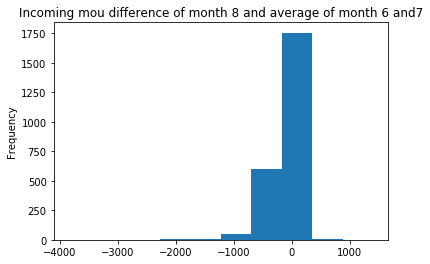

In [67]:
churn_df["total_ic_diff"].plot.hist()
plt.title("Incoming mou difference of month 8 and average of month 6 and7")
plt.show()

The negative difference indicates that the average incoming usage of month 6 and 7 was higher than the total usage of the month 8. We can see that the there is not much positive increase of the usage those who are churned. That means they used less incoming in month 8.

**Total Incoming Minute Of Usage Difference**

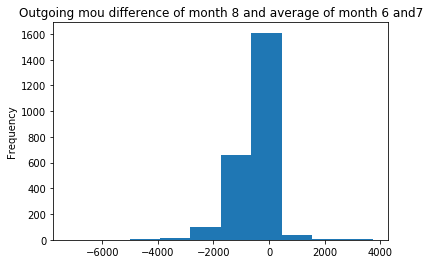

In [68]:
churn_df["total_og_diff"].plot.hist()
plt.title("Outgoing mou difference of month 8 and average of month 6 and7")
plt.show()

Similar distribution of the outgoing can be seen here. The negative difference indicates that the average outgoing usage of month 6 and 7 was higher than the total usage of the month 8. We can see that the there is not much positive increase of the usage those who are churned. That means they used less outgoing in month 8. So, overall we can say that people used less who are churned.

**Max Recharge Amount**

Checking the distribution of the churn portion of the data

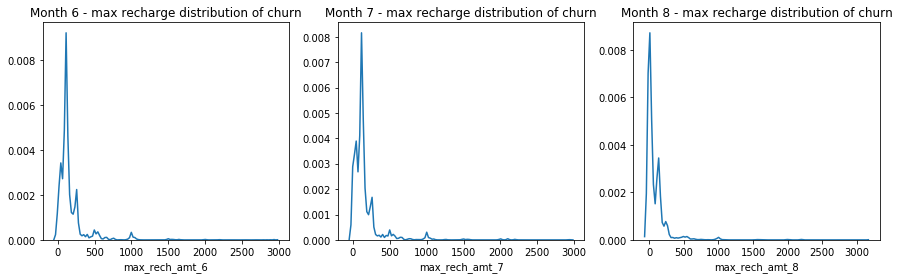

In [69]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.distplot(churn_df["max_rech_amt_6"], hist=False)
plt.title("Month 6 - max recharge distribution of churn")
plt.subplot(1,3,2)
sns.distplot(churn_df["max_rech_amt_7"], hist=False)
plt.title("Month 7 - max recharge distribution of churn")
plt.subplot(1,3,3)
sns.distplot(churn_df["max_rech_amt_8"], hist=False)
plt.title("Month 8 - max recharge distribution of churn")
plt.show()

Most of the churners recharged with less amount. The distribution is high towards 0 amount.

**Max data recharge**
Plotting distribution of the churn portion of the whole data.

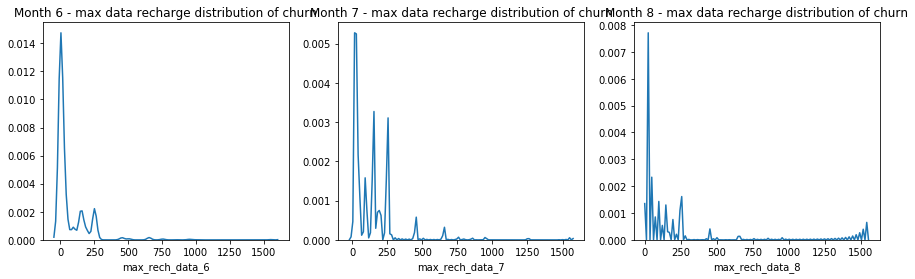

In [70]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.distplot(churn_df["max_rech_data_6"], hist=False)
plt.title("Month 6 - max data recharge distribution of churn")
plt.subplot(1,3,2)
sns.distplot(churn_df["max_rech_data_7"], hist=False)
plt.title("Month 7 - max data recharge distribution of churn")
plt.subplot(1,3,3)
sns.distplot(churn_df["max_rech_data_8"], hist=False)
plt.title("Month 8 - max data recharge distribution of churn")
plt.show()

Most of the churners did data recharge very less volume. Most of them did not recharge also in month 8.

**ARPU**
Plotting the histogram of the churn portion of the data.

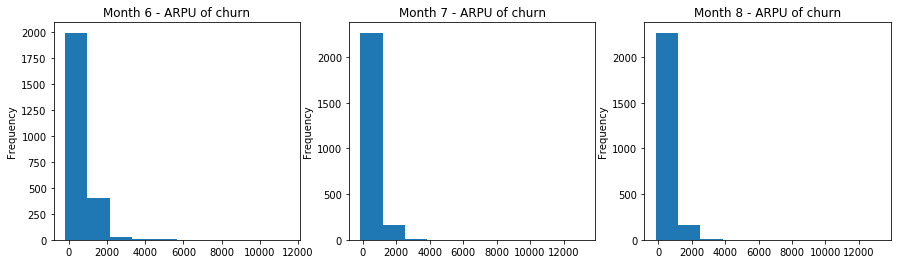

In [71]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
churn_df["arpu_6"].plot.hist()
plt.title("Month 6 - ARPU of churn")
plt.subplot(1,3,2)
churn_df["arpu_7"].plot.hist()
plt.title("Month 7 - ARPU of churn")
plt.subplot(1,3,3)
churn_df["arpu_7"].plot.hist()
plt.title("Month 8 - ARPU of churn")
plt.show()

The distribution is hghly skewed and not preperly distributed at all. Churners are distributed in the lower side of the arpu distribution.

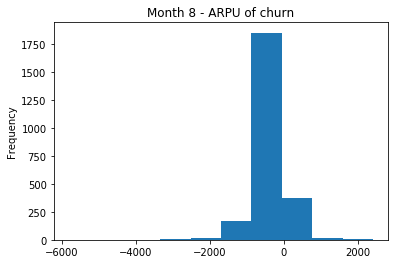

In [72]:
# Plotting the histogram of the difference of the august month and average of the june and july Average rating data.
churn_df["arpu_diff"].plot.hist()
plt.title("Month 8 - ARPU of churn")
plt.show()

We can see that the distribution is concentrated on the negative side of the difference indicating that the arpu in month 8 did not increase for the curners.

**Total Recharge Amount**

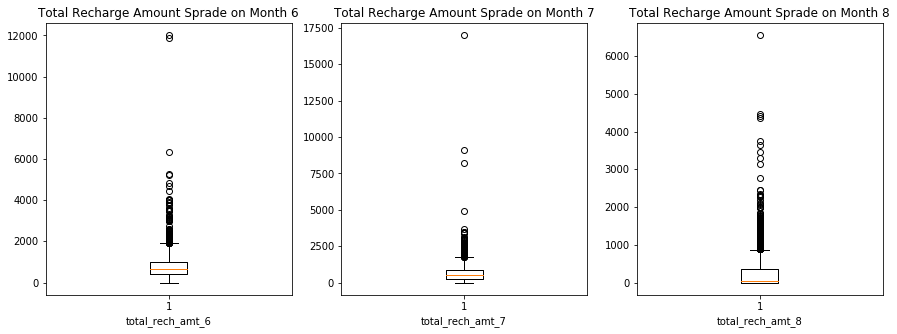

In [73]:
plt.figure(figsize=(15,5))
for i, col in enumerate(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8']):
    plt.subplot(1,3,i+1)
    plt.boxplot(churn_df[col])
    plt.title(f"Total Recharge Amount Sprade on Month {i+6}")
    plt.xlabel(col)

We can see that the totalrecharge amount spread was high in the month 6 and the gradually it got decreased for those who got churned.

### Bivariate analysis

**Total Recharge Numbers**

In [74]:
# Creating list of columns
total_rech_num = [col for col in df.columns if "total_rech_num" in col]
total_rech_num

['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8']

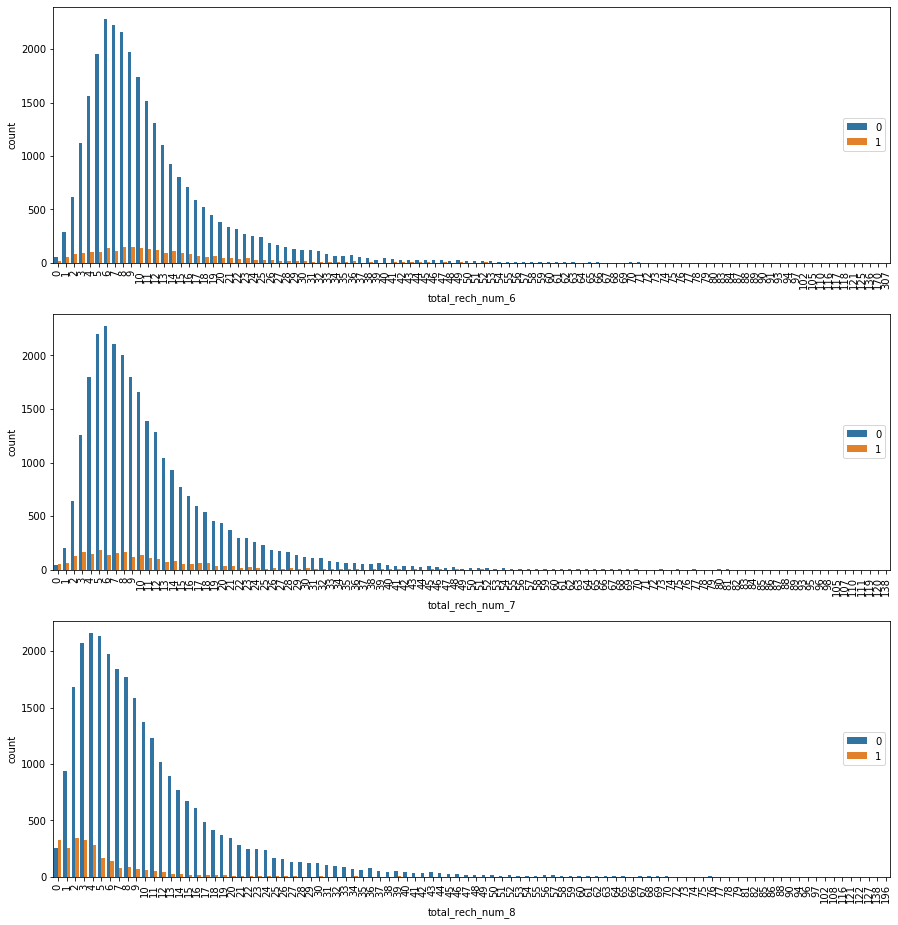

In [75]:
# Plotting the total recharge number during these 3 months
plt.figure(figsize=(15,16))
for i,col in enumerate(total_rech_num):
    plt.subplot(3,1,i+1)
    sns.countplot(df[col], hue=df["churn"])
    plt.xticks(rotation=90)
    plt.legend(loc="right")

- Those who recharged less number of times in month 6, are the highest churners.
- Those who recharged 14 times or below in month 7, are the highest churners.
- Those who recharged less than 4 times in month 8, are the highest churners.

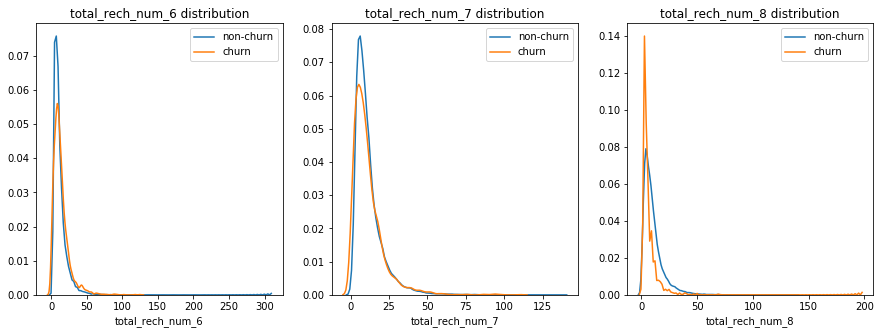

In [76]:
# Plotting the number of recharges distribution
plt.figure(figsize=(15,5))
for i,col in enumerate(total_rech_num):
    plt.subplot(1,3,i+1)
    sns.distplot(non_churn_df[col], hist=False, rug=False, label="non-churn")
    sns.distplot(churn_df[col], hist=False, rug=False, label="churn")
    plt.title(f"{col} distribution")
    plt.legend(loc="best")

We can see form the distribution that
- Crearly those who recharged less number of times in month 8 got churned in month 9.
- This is good indicator that if a person is recharging less number of time in month 8, has high chances to be churned.

**Total number of data recharge**

In [77]:
# Creating list of columns
total_rech_data = [col for col in df.columns if "total_rech_data" in col]
total_rech_data

['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8']

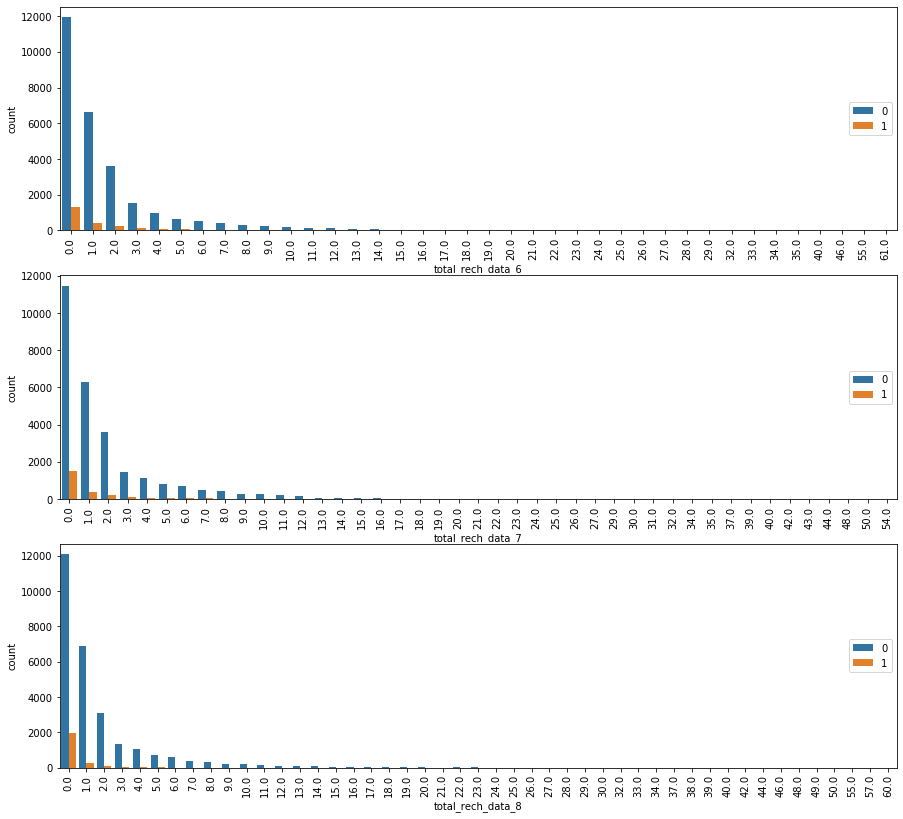

In [78]:
# Plotting the Total data recharge number during these 3 months
plt.figure(figsize=(15,14))
for i,col in enumerate(total_rech_data):
    plt.subplot(3,1,i+1)
    sns.countplot(df[col], hue=df["churn"])
    plt.xticks(rotation=90)
    plt.legend(loc="right")

- Less number of data recharge has high number of churn count.

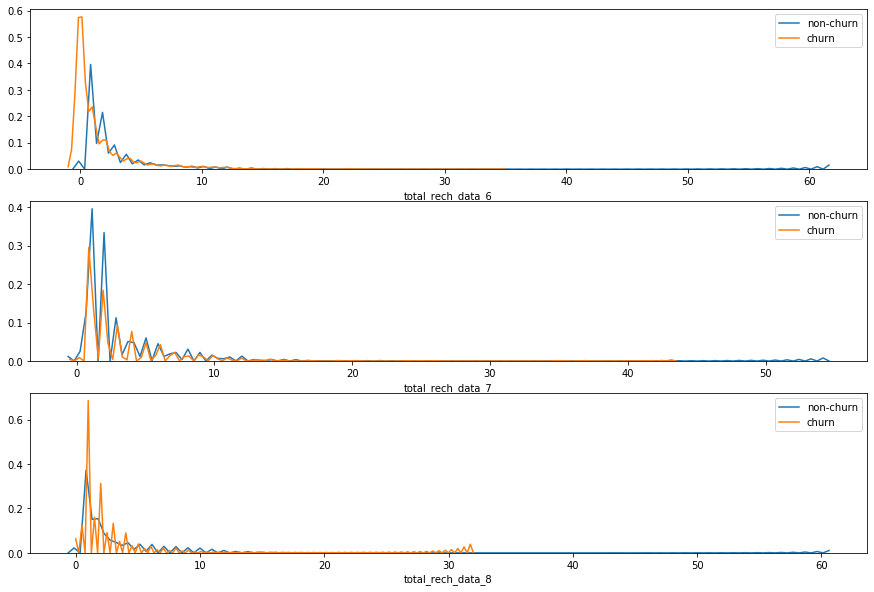

In [79]:
# Plotting the number of data recharges distribution
plt.figure(figsize=(15,10))
for i,col in enumerate(total_rech_data):
    plt.subplot(3,1,i+1)
    sns.distplot(non_churn_df[col], hist=False, rug=False, label="non-churn")
    sns.distplot(churn_df[col], hist=False, rug=False, label="churn")
    plt.legend(loc="best")

- The customer who did less number of data rechange in month 6 has high change to be churned.
- Customer who did not recharge in month 7, were the most churners. 

**Age on network - number of days the customer is using the operator T network (aon)**

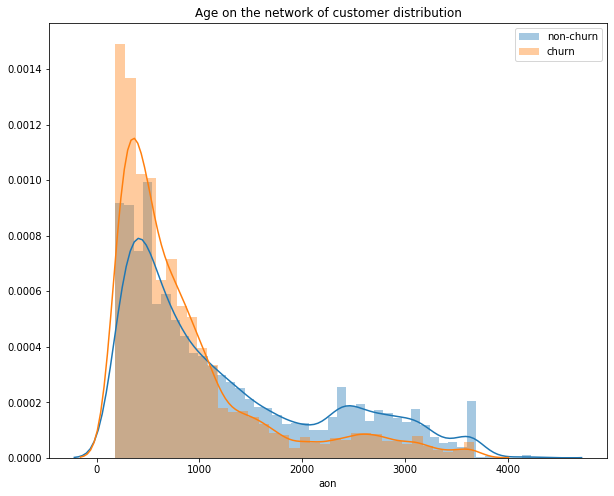

In [80]:
# Plotting distribution of aon
plt.figure(figsize=(10,8))
sns.distplot(non_churn_df["aon"], hist=True, rug=False, label="non-churn")
sns.distplot(churn_df["aon"], hist=True, rug=False, label="churn")
plt.title("Age on the network of customer distribution")
plt.legend(loc="best");

- We can see that around 300-500 days age bucket are most likely to be churned.

**Analysing all the data volumns usage columns with respect to total recharge of data amount of the churn portion of the data**

In [81]:
vol_data = [col for col in df.columns if "vol" in col]
vol_data

['vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_2g_mb_8',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'vol_3g_mb_8']

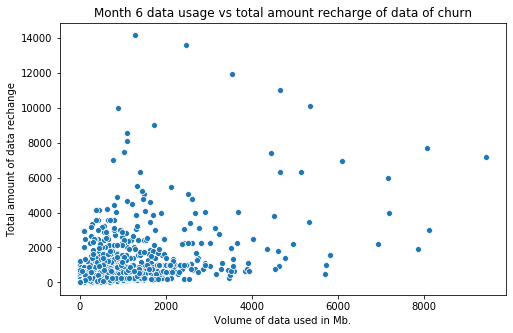

In [82]:
# Plotting month 6  data usage vs amount recharge
plt.figure(figsize=(8, 5))
sns.scatterplot(churn_df["vol_2g_mb_6"]+churn_df["vol_3g_mb_6"], churn_df["total_rech_amt_data_6"])
plt.title("Month 6 data usage vs total amount recharge of data of churn")
plt.xlabel("Volume of data used in Mb.")
plt.ylabel("Total amount of data rechange")
plt.show()

- We can see most of the churners used below around 2000mb of data.
- Customers who recharged with less than 2000rs are likely to be churn.
- We can assume that beyond 1500mb data user and recharged with more than 2000rs in month 6, are not going to churn.

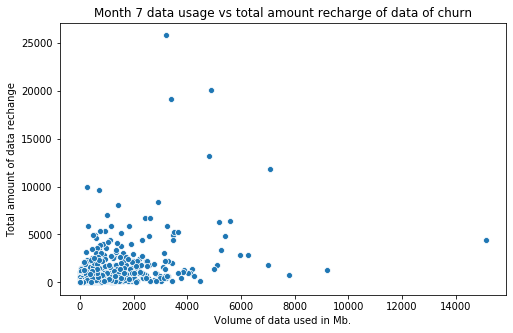

In [83]:
# Plotting month 7  data usage vs amount recharge
plt.figure(figsize=(8, 5))
sns.scatterplot(churn_df["vol_2g_mb_7"]+churn_df["vol_3g_mb_7"], churn_df["total_rech_amt_data_7"])
plt.title("Month 7 data usage vs total amount recharge of data of churn")
plt.xlabel("Volume of data used in Mb.")
plt.ylabel("Total amount of data rechange")
plt.show()

- Total amount of data recharge has positive correlation with volume of data used.
- We can see most of the churners used below 1000mb of data.
- Customers who recharged with less than 1000rs are likely to be churn.
- We can assume that beyond 1000mb data user and recharged with more than 1000rs in month 7, has very less chance to be churned.

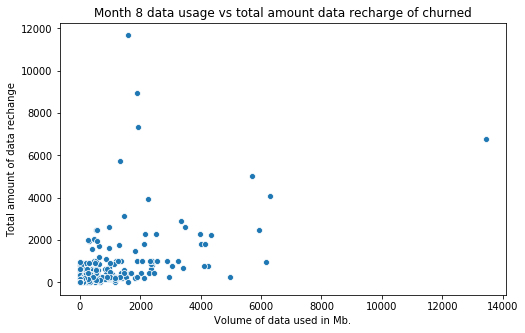

In [84]:
# Plotting month 8 data usage vs amount recharge
plt.figure(figsize=(8, 5))
sns.scatterplot(churn_df["vol_2g_mb_8"]+churn_df["vol_3g_mb_8"], churn_df["total_rech_amt_data_8"])
plt.title("Month 8 data usage vs total amount data recharge of churned")
plt.xlabel("Volume of data used in Mb.")
plt.ylabel("Total amount of data rechange")
plt.show()

- We can see that most of the churners used below 1200 mb of data in month 8.
- Also most of the churners recharged with less than 400rs in month 8.

**ARPU**

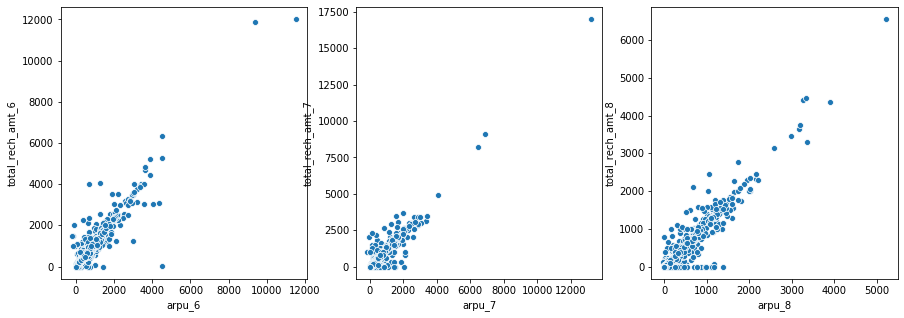

In [85]:
# Plotting 3 months arpu against total recharge of individual month
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
sns.scatterplot(churn_df["arpu_6"], churn_df["total_rech_amt_6"])
plt.subplot(1,3,2)
sns.scatterplot(churn_df["arpu_7"], churn_df["total_rech_amt_7"])
plt.subplot(1,3,3)
sns.scatterplot(churn_df["arpu_8"], churn_df["total_rech_amt_8"])
plt.show()

- Average rating is highly correlated with total recharge amount and this is obvious.
- arpu below 4000 and total recharge amount belwo 4000rs are more likely to be churners in month 6.
- arpu below 3000 and total recharge amount belwo 4000rs are more likely to be churners in month 7.
- arpu below 1500 and total recharge amount belwo 2000rs are more likely to be churners in month 8.

**Onnet usage vs Offnet usage**

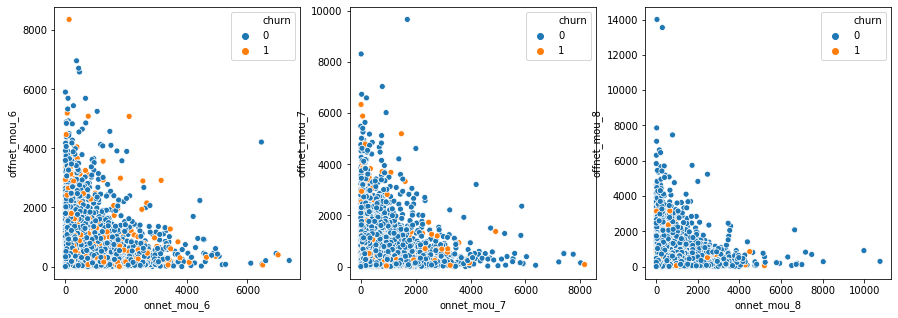

In [86]:
# Plotting 3 months arpu against total recharge of individual month
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
sns.scatterplot(df["onnet_mou_6"], df["offnet_mou_6"], hue=df["churn"])
plt.subplot(1,3,2)
sns.scatterplot(df["onnet_mou_7"], df["offnet_mou_7"], hue=df["churn"])
plt.subplot(1,3,3)
sns.scatterplot(df["onnet_mou_8"], df["offnet_mou_8"], hue=df["churn"])
plt.show()

- Here the churn data is allover the place and hard to interprete the data.
- On month 7 below 1500min offnet users got churned.
- We can see more concentration near the less onnet/offnet.

### Outliers Treatment

In [87]:
# seperating the X and y as we dont want to treat the target column as these are just 1/0 labels only.
X = df.drop("churn", axis = 1)
y = df["churn"]

In [89]:
# Checking all teh data types if these are numerical or not.
X.dtypes

arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
loc_og_t2t_mou_6            float64
loc_og_t2t_mou_7            float64
loc_og_t2t_mou_8            float64
loc_og_t2m_mou_6            float64
loc_og_t2m_mou_7            float64
loc_og_t2m_mou_8            float64
loc_og_t2f_mou_6            float64
loc_og_t2f_mou_7            float64
loc_og_t2f_mou_8            float64
loc_og_t2c_mou_6            float64
loc_og_t2c_mou_7            float64
loc_og_t2c_mou_8            float64
loc_og_mou_6                

#### We can see all the columns are in number. So, just capping the outliers at 0.01 and 0.99 percentile of the X data frame.

In [90]:
for col in X.columns:
    percentiles = df[col].quantile([0.01,0.99]).values
    X[col][X[col] <= percentiles[0]] = percentiles[0]
    X[col][X[col] >= percentiles[1]] = percentiles[1]

# 4. Preprocessing Data

In [91]:
# Spliting the train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [92]:
# print shapes of train and test sets
X_train.shape, y_train.shape, X_test.shape,y_test.shape

((24000, 141), (24000,), (6001, 141), (6001,))

### Dealing with data imbalance

In [93]:
# Imporing SMOTE
from imblearn.over_sampling import SMOTE

In [94]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)

In [95]:
# Fittign SMOTE to the train set
X_train, y_train = sm.fit_sample(X_train, y_train)

In [96]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_og_diff,total_ic_diff,arpu_diff,total_rech_amt_data_diff
0,878.500,289.000,256.900,0.00,0.00,2.98,73.04,26.940,9.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,27.53,18.88,3.08,40.61,0.21,6.76,0.00,0.0,0.0,68.14,19.09,9.84,0.00,0.00,2.98,0.20,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.20,0.00,2.98,35.99,10.7,5.14,0.00,0.00,0.00,0.00,0.0,0.0,104.34,29.79,17.98,0.00,0.00,0.00,3.06,12.06,7.26,1.98,35.39,6.63,5.04,47.46,13.89,0.00,0.00,19.03,0.00,0.18,0.33,0.0,0.0,0.0,0.00,0.18,19.36,5.04,47.83,37.24,0.0,0.0,0.0,0.00,0.18,3.98,0.0,0.0,0.0,2,1,0,2100,0,0,1000,0,0,655,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0,0,0,0,0,0,3509,0.00,0.00,0.00,0.0,0.0,0.0,0.0,-49.085,10.805,-326.8500,0.0
1,393.700,584.904,727.171,41.96,47.44,50.96,384.21,393.960,523.21,0.0,0.0,0.0,0.0,0.0,0.0,41.96,47.44,50.96,290.04,349.66,429.38,77.59,33.13,82.24,0.00,0.0,0.0,409.61,430.24,574.18,0.00,0.00,0.00,0.00,1.35,0.00,16.56,9.81,0.00,0.0,0.0,0.0,16.56,11.16,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,426.18,441.41,574.18,35.26,47.16,6.48,169.29,169.89,137.19,11.24,3.64,7.41,215.81,220.71,151.09,11.63,0.00,0.00,0.00,1.21,1.54,0.0,0.0,0.0,11.99,4.01,1.54,227.81,224.73,152.64,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,2,1,4,599,550,709,599,550,459,599,550,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0,0,0,0,0,0,2551,0.00,0.00,0.00,0.0,0.0,0.0,0.0,140.385,-73.630,237.8690,0.0
2,175.147,213.844,0.000,34.31,32.33,32.36,96.31,91.735,92.14,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,2,4,0,200,252,0,200,252,0,0,252,0,1.0,1.0,0.0,252.0,252.0,0.0,0.0,0.00,0.00,66.67,1121.71,0.00,417.17,

# 5. PCA

### Scaling data using Standard Scaler

In [97]:
#Initialize the Standard Scaler
scaler = StandardScaler()

# Scaling the train data
X_train[:] = scaler.fit_transform(X_train[:])

In [98]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_og_diff,total_ic_diff,arpu_diff,total_rech_amt_data_diff
0,0.796919,-0.650213,-0.285558,-0.652713,-0.613208,-0.494492,-0.676274,-0.731455,-0.665765,-0.297571,-0.311297,-0.31227,-0.314281,-0.342257,-0.338119,-0.476378,-0.456441,-0.398415,-0.546153,-0.563177,-0.526528,3.174410,-0.345149,0.320493,-0.370679,-0.367229,-0.303768,-0.465306,-0.605366,-0.517618,-0.508449,-0.479599,-0.352300,-0.529907,-0.501424,-0.392307,-0.225964,-0.217626,-0.185058,0.0,0.0,0.0,-0.685583,-0.643398,-0.469452,7.194282,2.267813,1.709127,-0.520335,-0.527754,-0.423391,-0.429303,0.0,0.0,-0.794327,-0.837795,-0.630103,-0.580351,-0.546854,-0.460289,-0.730903,-0.645982,-0.542359,-0.327507,0.929619,-0.059316,-0.755130,-0.539142,-0.545262,-0.421423,-0.392045,0.481333,-0.496243,-0.452175,-0.360679,0.0,0.0,0.0,-0.533019,-0.487190,-0.100627,-0.824436,-0.627066,-0.503973,-0.459961,-0.245445,-0.204768,-0.282093,-0.266050,-0.059219,-0.27331,-0.252279,-0.215545,-1.211212,-1.212694,-0.969814,3.118107,-1.373264,-0.914746,5.483561,-1.013855,-0.850020,5.234312,-0.811486,-0.630696,-0.613645,-0.596537,-0.484570,-0.692099,-0.660177,-0.533320,-0.428864,-0.394254,-0.312258,-0.437814,-0.420283,-0.363283,-0.422546,-0.402284,-0.335303,-0.455854,-0.419406,-0.346454,-0.305401,-0.307048,-0.27735,-0.335807,-0.328943,-0.284383,2.868654,-0.356114,-0.398355,-0.404388,-0.162631,-0.466448,-0.440267,-0.344506,0.381139,0.421688,-0.439899,0.210119
1,-0.489057,0.156902,0.959687,-0.558658,-0.502956,-0.353451,-0.029778,0.064537,0.773455,-0.297571,-0.311297,-0.31227,-0.314281,-0.342257,-0.338119,-0.160240,-0.084569,0.067500,0.823439,1.265353,1.995573,6.402298,2.561685,7.491431,-0.370679,-0.367229,-0.303768,0.688828,0.866174,1.681781,-0.508449,-0.479599,-0.362358,-0.530387,-0.498076,-0.392307,3.349653,2.038956,-0.185058,0.0,0.0,0.0,-0.660065,-0.625373,-0.475760,-0.193545,-0.181040,-0.146893,-0.520335,-0.527754,-0.423391,-0.429303,0.0,0.0,-0.336130,-0.234535,0.344209,-0.166598,0.008618,-0.375854,0.266132,0.345752,0.317836,0.027330,-0.

In [99]:
# Transforming the test data
X_test[:] = scaler.transform(X_test[:])

Applying PCA on the data

In [100]:
pca = PCA(random_state=42)

In [101]:
# Fitting the train set
pca.fit(X_train)

PCA(random_state=42)

In [104]:
# Checking the variance of the components
pca.components_

array([[ 9.08648296e-02,  1.41058338e-01,  1.75404442e-01, ...,
         1.77979739e-02,  7.11270918e-02,  4.68406620e-02],
       [-7.98423878e-02, -6.76090401e-02, -6.37835116e-03, ...,
         4.01256124e-02,  7.38777282e-02, -3.68186803e-02],
       [ 7.57787944e-02,  1.51259385e-01,  1.45320561e-01, ...,
         8.49134150e-02,  3.92637538e-02,  1.84316009e-02],
       ...,
       [ 0.00000000e+00, -1.25672330e-16, -1.25508492e-16, ...,
         6.66285085e-17,  8.27863024e-17,  8.08445308e-17],
       [-0.00000000e+00, -5.43696333e-17,  6.63775690e-17, ...,
         2.28807820e-16,  5.75775755e-17,  1.06535640e-16],
       [ 0.00000000e+00, -5.06115756e-17, -2.59673641e-18, ...,
         7.11638742e-17,  1.75396962e-16,  5.85732472e-17]])

In [103]:
pca.explained_variance_ratio_

array([1.24421647e-01, 1.10460574e-01, 6.69478716e-02, 4.83278915e-02,
       4.26505641e-02, 3.97364958e-02, 3.20515129e-02, 2.83518797e-02,
       2.44983782e-02, 2.23836210e-02, 2.06777917e-02, 2.02511027e-02,
       1.94460786e-02, 1.90819797e-02, 1.77757135e-02, 1.53729654e-02,
       1.44799307e-02, 1.32002667e-02, 1.27449252e-02, 1.25239813e-02,
       1.12919988e-02, 1.04990967e-02, 1.01567027e-02, 9.43885082e-03,
       9.34975919e-03, 8.94146625e-03, 8.17631906e-03, 8.04028399e-03,
       7.73095364e-03, 7.62247939e-03, 7.43265863e-03, 6.84286439e-03,
       6.63257140e-03, 6.52180951e-03, 6.27617058e-03, 6.21659180e-03,
       5.99752576e-03, 5.94338047e-03, 5.71554348e-03, 5.62335740e-03,
       5.44255182e-03, 5.34243355e-03, 5.25776903e-03, 4.89622837e-03,
       4.49805914e-03, 4.29669448e-03, 4.12676344e-03, 4.08113264e-03,
       3.92150001e-03, 3.70557040e-03, 3.61174967e-03, 3.46923699e-03,
       3.36972444e-03, 3.27992452e-03, 3.22105302e-03, 3.17429763e-03,
      

#### Making Scree plot

In [105]:
# Creating cumulative variance to plot 
var_cum = np.cumsum(pca.explained_variance_ratio_)

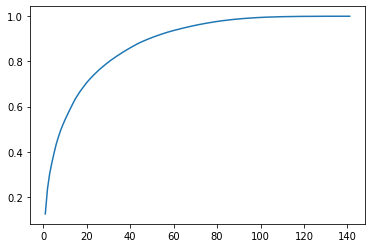

In [106]:
plt.plot(range(1, len(var_cum)+1), var_cum);

Almost 60 components are explaining 90% of the variance. So let's choose 60 components for the modeling.

We will use IncrementalPCA to build the final PCA with 60 components.

In [107]:
pca_final = IncrementalPCA(n_components=60)

In [108]:
# Transforming the train set
X_pca_train = pca_final.fit_transform(X_train)

In [109]:
X_pca_train.shape

(44168, 60)

In [110]:
# Creating correlation coefficient matrix
corrmat = np.corrcoef(X_pca_train.transpose())

In [111]:
corrmat.shape

(60, 60)

Plotting the heatmap of the correlation matrix

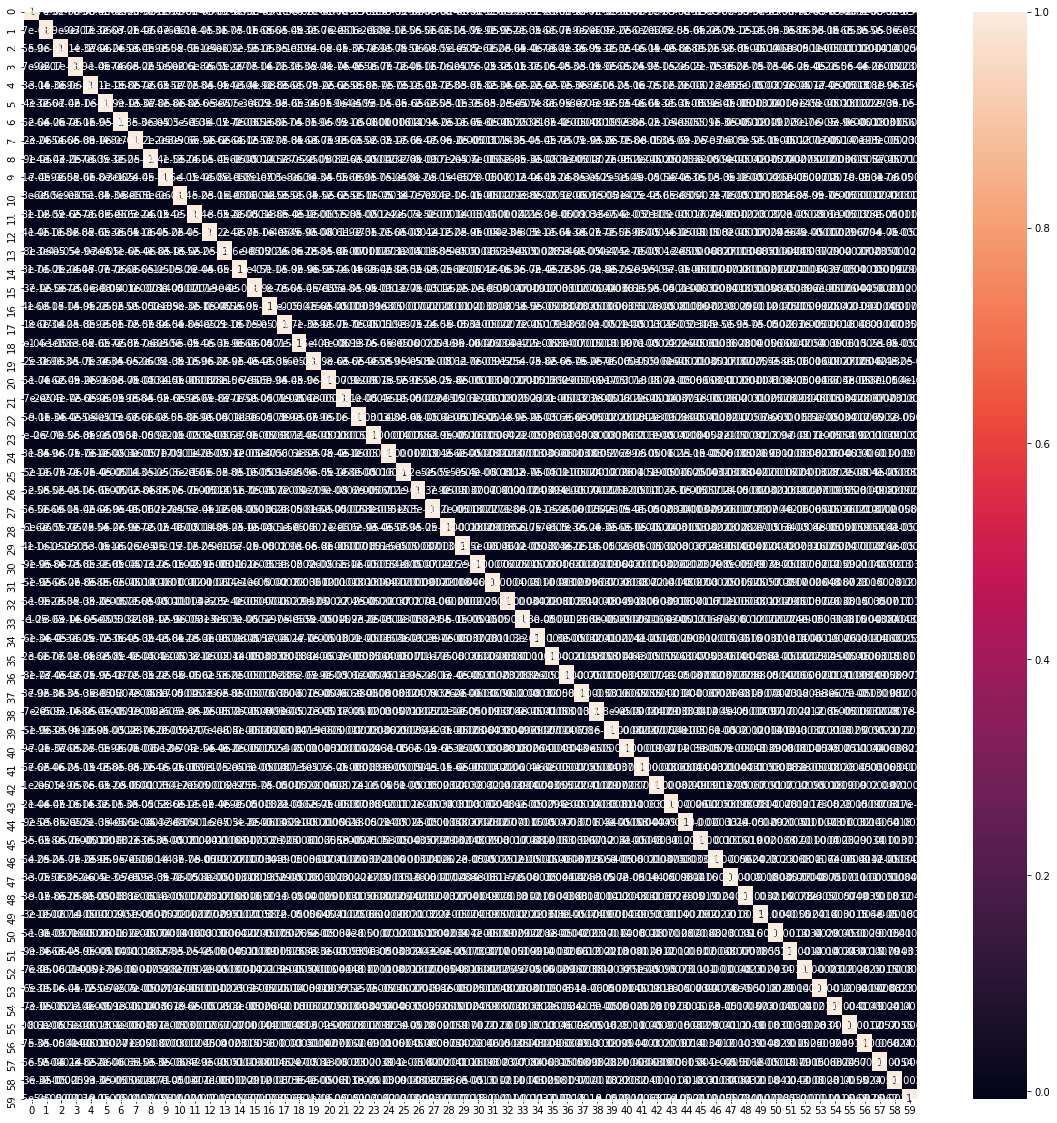

In [112]:
plt.figure(figsize=(20,20))
sns.heatmap(corrmat, annot=True);

So we can see that multicoleanirity is taken care of by the PCA. So we can now fit the test set to obtain the test set with dimentionality redution.

In [113]:
# Transforming test data set.
X_pca_test = pca_final.transform(X_test)
X_pca_test.shape

(6001, 60)

# 6. Modeling on PCA data
We will give more stress on the **Sensitivity** rather than the `Accuracy` of the model as we need to identify the churn people. If the Sensitivity score is high, that means the model will be able to identify the high percentage of churns among the actual churn 

### Applying Logistic Regression on PCA

In [114]:
# Instanciating the LogisticRegression 
learner_pca = LogisticRegression(random_state=42)

In [115]:
# building model with pca_train data
model_pca = learner_pca.fit(X_pca_train, y_train)

#### Making prediction on train set

In [116]:
# Making prediction
y_train_pred = model_pca.predict(X_pca_train)

In [117]:
# Creating function to display Accuray, Sensitivity/ Recall and Confusion Matrix

def display_scores(y_test, y_pred):
    '''
    Display Accuray score, Sensitivity/ Recall score and Confusion Matrix of a model.
    '''
    confusion = confusion_matrix(y_test, y_pred)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    
    
    print(f"Accuracy Score: {round(accuracy_score(y_test, y_pred)*100,2)}%")
    print(f"Sensitivity/Recall Score: {round(recall_score(y_test, y_pred)*100,2)}%") 
    print(f"Specificity score: {round((TN / float(TN+FP))*100,2)}%") 
    print(f"Precision Score: {round(precision_score(y_test, y_pred)*100,2)}%")    
    print(f"Confusion Matrix: \n {confusion}") 
  

In [118]:
# Printing train scores
display_scores(y_train, y_train_pred)

Accuracy Score: 85.01%
Sensitivity/Recall Score: 87.3%
Specificity score: 82.71%
Precision Score: 83.47%
Confusion Matrix: 
 [[18266  3818]
 [ 2804 19280]]


Sensitivity on the train set is 87%.

In [119]:
# Defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs, drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [120]:
# Predicting probability
y_pred_prob = model_pca.predict_proba(X_pca_train)[:, 1]

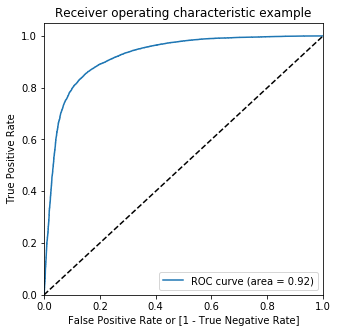

In [121]:
draw_roc(y_train, y_pred_prob)

We can see that 92% area is under the curve so model is not bad. If the curve is far away from the 45degree line, then we can say that the model is performing well.

#### Making prediction on the test set

In [122]:
pred_probs_test = model_pca.predict_proba(X_pca_test)

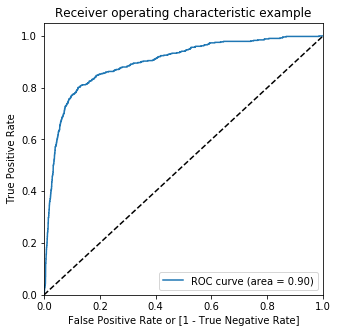

In [123]:
# Calling the function
draw_roc(y_test, pred_probs_test[:,1])

We can see that 90% area is under the curve so model is not bad.

In [124]:
# Prediction on pca_test data
y_pred = model_pca.predict(X_pca_test)
y_pred[:10]

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [125]:
# Printing scores
display_scores(y_test, y_pred)

Accuracy Score: 83.67%
Sensitivity/Recall Score: 82.48%
Specificity score: 83.78%
Precision Score: 32.78%
Confusion Matrix: 
 [[4588  888]
 [  92  433]]


Sensitivity is 82%. So the model can identify 82% of the churn among the actual churn accurately.

### Hyperparameter tuning for Logistic Regression on PCA

In [126]:
# class imbalance
y_train.value_counts()/y_train.shape

1    0.5
0    0.5
Name: churn, dtype: float64

In [127]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 

In [128]:
# Fit grid search
model = model_cv.fit(X_pca_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    7.4s finished


In [129]:
# cross validation results
cv_results = pd.DataFrame(model.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.530053,0.024282,0.008049,0.007003,0.01,{'C': 0.01},0.866422,0.873175,0.879299,0.870902,0.871170,0.872194,0.004183,6,0.873978,0.872881,0.870315,0.873167,0.873162,0.872700,0.001248
1,0.549303,0.021814,0.019117,0.006308,0.1,{'C': 0.1},0.865733,0.873631,0.880872,0.870676,0.871170,0.872417,0.004944,2,0.874203,0.873051,0.871165,0.873790,0.872935,0.873029,0.001043
2,0.541054,0.037400,0.011396,0.006085,1,{'C': 1},0.865963,0.873859,0.880647,0.870224,0.871393,0.872417,0.004844,1,0.874260,0.873220,0.871222,0.873790,0.872992,0.873097,0.001037
3,0.515667,0.019704,0.009375,0.007654,10,{'C': 10},0.865963,0.873631,0.880647,0.870224,0.871393,0.872372,0.004832,3,0.874203,0.873220,0.871222,0.873846,0.872992,0.873097,0.001032
4,0.515591,0.017114,0.009373,0.007653,100,{'C': 100},0.865963,0.873631,0.880647,0.870224,0.871393,0.872372,0.004832,3,0.874203,0.873220,0.871222,0.873846,0.872992,0.873097,0.001032
5,0.478094,0.059779,0.009373,0.007653,1000,{'C': 1000},0.865963,0.873631,0.880647,0.870224,0.871393,0.872372,0.004832,3,0.874203,0.873220,0.871222,0.873846,0.872992,0.873097,0.001032


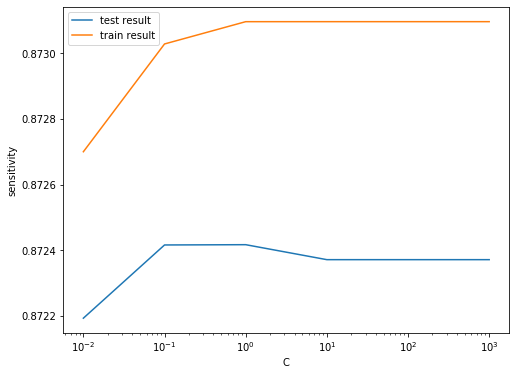

In [130]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [131]:
# View best hyperparameters
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print('Best Sensitivity:', best_score)
print('Best Penalty:', model_cv.best_estimator_.get_params()['penalty'])
print('Best C:', best_C)

Best Sensitivity: 0.8724173796507573
Best Penalty: l2
Best C: 1


#### Logistic regression with optimal C

In [132]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)

In [133]:
# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_pca_train, y_train)

#### Prediction on the train set

In [134]:
# predict churn on test data
y_train_pred = log_pca_model.predict(X_pca_train)

In [135]:
display_scores(y_train, y_train_pred)

Accuracy Score: 85.01%
Sensitivity/Recall Score: 87.3%
Specificity score: 82.71%
Precision Score: 83.47%
Confusion Matrix: 
 [[18266  3818]
 [ 2804 19280]]


Sensitivity on the train set 87%.

#### Prediction on test set

In [137]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_pca_test)

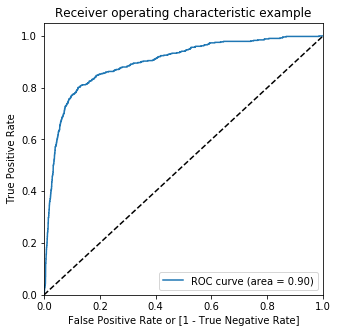

In [138]:
y_pred_prob = log_pca_model.predict_proba(X_pca_test)[:, 1]
draw_roc(y_test, y_pred_prob)

AUC score is 90% on the test data. This looks good.

In [139]:
display_scores(y_test, y_pred)

Accuracy Score: 83.67%
Sensitivity/Recall Score: 82.48%
Specificity score: 83.78%
Precision Score: 32.78%
Confusion Matrix: 
 [[4588  888]
 [  92  433]]


Sensitivity on the test data is 83%. So the model can identify 83% of the churn among the actual churn accurately on the unseen data.

### Applying Random Forest Classifier on PCA

In [140]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a base model
rf = RandomForestClassifier()
# Instantiate the grid search model
model = GridSearchCV(estimator = rf, 
                     param_grid = param_grid,
                     cv = 3,
                     n_jobs = -1,
                     verbose = 1,
                     scoring="recall",
                     return_train_score=True)

In [141]:
# fit model
model.fit(X_pca_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed: 20.4min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='recall', verbose=1)

In [142]:
# cv results
cv_results = pd.DataFrame(model.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,21.399335,0.074831,0.218736,3.371748e-07,5,10,50,50,100,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.814971,0.837544,0.820405,0.824307,0.009620,11,0.838688,0.827741,0.826937,0.831122,0.005360
1,41.026152,0.449103,0.395807,7.365471e-03,5,10,50,50,200,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.817960,0.838495,0.825567,0.827341,0.008477,7,0.838280,0.830118,0.829111,0.832503,0.004106
2,60.782669,0.279773,0.598918,2.946121e-02,5,10,50,50,300,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.811167,0.836729,0.828148,0.825348,0.010622,9,0.835088,0.828760,0.832914,0.832254,0.002625
3,20.134036,0.128417,0.213527,7.364516e-03,5,10,50,100,100,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.822850,0.838767,0.828692,0.830103,0.006574,3,0.844461,0.828828,0.832779,0.835356,0.006637
4,40.247237,0.044190,0.442680,7.363898e-03,5,10,50,100,200,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.819726,0.842570,0.830594,0.830963,0.009330,1,0.843714,0.834262,0.836786,0.838254,0.003996
5,60.521888,0.174137,0.588502,7.365583e-03,5,10,50,100,300,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.815922,0.839038,0.835348,0.830103,0.010140,4,0.838892,0.832224,0.838348,0.836488,0.003023
6,20.024668,0.103112,0.213528,7.365358e-03,5,10,100,50,100,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.819997,0.831568,0.823801,0.825122,0.004815,10,0.842084,0.823665,0.826530,0.830760,0.008092
7,45.959120,4.009621,0.664388,1.962757e-01,5,10,100,50,200,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.818639,0.845966,0.828284,0.830963,0.011316,2,0.842152,0.835552,0.833050,0.836918,0.003839
8,73.213965,3.743432,0.632003,5.029723e-02,5,10,100,50,300,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.814699,0.836050,0.827741,0.826163,0.008788,8,0.837533,0.828420,0.834409,0.833454,0.003781
9,22.736650,2.750529,0.250888,1.166688e-02,5,10,100,100,100,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.805461,0.832790,0.827197,0.821816,0.011788,12,0.828771,0.825567,0.832507,0.828948,0.002836


In [143]:
# print best hyperparameters
print("Best Sensitivity: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best Sensitivity:  0.8309630679729286
Best hyperparameters:  {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 200}


#### Model with optimal hyperparameters

In [144]:
# model with the best hyperparameters
rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=10,
                             n_estimators=200)

In [145]:
# Fit the model
rfc_model.fit(X_pca_train, y_train)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=200)

#### Prediction on train set

In [146]:
# Predictions on the train set
y_train_pred = rfc_model.predict(X_pca_train)

In [147]:
# Printing scores
display_scores(y_train, y_train_pred)

Accuracy Score: 84.04%
Sensitivity/Recall Score: 83.45%
Specificity score: 84.64%
Precision Score: 84.45%
Confusion Matrix: 
 [[18691  3393]
 [ 3655 18429]]


Sensitivity on the train set is 84%.

#### Prediction on test set

In [148]:
# predict churn on test data
y_pred = model.predict(X_pca_test)

In [149]:
# Printing scores on train set
display_scores(y_test, y_pred)

Accuracy Score: 83.6%
Sensitivity/Recall Score: 76.38%
Specificity score: 84.3%
Precision Score: 31.8%
Confusion Matrix: 
 [[4616  860]
 [ 124  401]]


Sensitivity on the test set is 76% which is less than Logistic regression sensitivity.

In [150]:
# check area under curve
y_pred_prob = model.predict_proba(X_pca_test)[:, 1]

### Applying Decision Tree Classifier on PCA

In [151]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_pca_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   36.7s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [152]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.456063,0.089873,0.020347,0.020432,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.798506,0.812995,0.807562,0.813179,0.820014,0.810451,0.007161,5
1,2.375695,0.102859,0.010920,0.005801,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.798506,0.812995,0.807562,0.813179,0.820014,0.810451,0.007161,5
2,2.213514,0.039030,0.011574,0.006058,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.786507,0.813674,0.812542,0.813632,0.819787,0.809229,0.011644,7
3,2.261533,0.023778,0.006250,0.007655,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.786507,0.813674,0.812542,0.813632,0.819787,0.809229,0.011644,7
4,3.974589,0.045390,0.012720,0.002215,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.837673,0.859180,0.874123,0.865036,0.864614,0.860125,0.012208,2
5,3.935415,0.118754,0.015624,0.000001,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.837673,0.860312,0.874349,0.865036,0.864614,0.860397,0.012250,1
6,4.563883,0.795561,0.011720,0.006027,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.824994,0.854200,0.845823,0.839674,0.853973,0.843733,0.010830,3
7,4.830973,0.177077,0.010994,0.000632,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.824994,0.854200,0.845823,0.839674,0.853973,0.843733,0.010830,3


In [153]:
# Printing the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.860396877348059
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


#### Model with optimal hyperparameter

In [154]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_pca_model.fit(X_pca_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

#### Prediction on train set

In [155]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_pca_train)

In [156]:
display_scores(y_train, y_train_pred)

Accuracy Score: 87.35%
Sensitivity/Recall Score: 88.44%
Specificity score: 86.26%
Precision Score: 86.55%
Confusion Matrix: 
 [[19050  3034]
 [ 2552 19532]]


Sensitivity on the train set is 88%

#### Prediction on test set

In [157]:
y_pred = dt_pca_model.predict(X_pca_test)

In [158]:
display_scores(y_test, y_pred)

Accuracy Score: 83.47%
Sensitivity/Recall Score: 73.14%
Specificity score: 84.46%
Precision Score: 31.09%
Confusion Matrix: 
 [[4625  851]
 [ 141  384]]


Sensitivity on the test set of decision tree is 73%. It is also very poor than Logistic Regression.

### Conclusion of the models done with PCA

We have done several models with PCA and found tht the Logistic Regression model is giving better sensitivity on the unseen data as well as the train set. For this case study, we need to focus on the churn person rather than the non churn people. So we are selecting the Logistic Regression model as it has 83% sensitivity and 84% accuracy on unseen data.

# 7. Model without PCA

In [159]:
# Importing stats model
import statsmodels.api as sm

In [160]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_og_diff,total_ic_diff,arpu_diff,total_rech_amt_data_diff
0,0.796919,-0.650213,-0.285558,-0.652713,-0.613208,-0.494492,-0.676274,-0.731455,-0.665765,-0.297571,-0.311297,-0.31227,-0.314281,-0.342257,-0.338119,-0.476378,-0.456441,-0.398415,-0.546153,-0.563177,-0.526528,3.174410,-0.345149,0.320493,-0.370679,-0.367229,-0.303768,-0.465306,-0.605366,-0.517618,-0.508449,-0.479599,-0.352300,-0.529907,-0.501424,-0.392307,-0.225964,-0.217626,-0.185058,0.0,0.0,0.0,-0.685583,-0.643398,-0.469452,7.194282,2.267813,1.709127,-0.520335,-0.527754,-0.423391,-0.429303,0.0,0.0,-0.794327,-0.837795,-0.630103,-0.580351,-0.546854,-0.460289,-0.730903,-0.645982,-0.542359,-0.327507,0.929619,-0.059316,-0.755130,-0.539142,-0.545262,-0.421423,-0.392045,0.481333,-0.496243,-0.452175,-0.360679,0.0,0.0,0.0,-0.533019,-0.487190,-0.100627,-0.824436,-0.627066,-0.503973,-0.459961,-0.245445,-0.204768,-0.282093,-0.266050,-0.059219,-0.27331,-0.252279,-0.215545,-1.211212,-1.212694,-0.969814,3.118107,-1.373264,-0.914746,5.483561,-1.013855,-0.850020,5.234312,-0.811486,-0.630696,-0.613645,-0.596537,-0.484570,-0.692099,-0.660177,-0.533320,-0.428864,-0.394254,-0.312258,-0.437814,-0.420283,-0.363283,-0.422546,-0.402284,-0.335303,-0.455854,-0.419406,-0.346454,-0.305401,-0.307048,-0.27735,-0.335807,-0.328943,-0.284383,2.868654,-0.356114,-0.398355,-0.404388,-0.162631,-0.466448,-0.440267,-0.344506,0.381139,0.421688,-0.439899,0.210119
1,-0.489057,0.156902,0.959687,-0.558658,-0.502956,-0.353451,-0.029778,0.064537,0.773455,-0.297571,-0.311297,-0.31227,-0.314281,-0.342257,-0.338119,-0.160240,-0.084569,0.067500,0.823439,1.265353,1.995573,6.402298,2.561685,7.491431,-0.370679,-0.367229,-0.303768,0.688828,0.866174,1.681781,-0.508449,-0.479599,-0.362358,-0.530387,-0.498076,-0.392307,3.349653,2.038956,-0.185058,0.0,0.0,0.0,-0.660065,-0.625373,-0.475760,-0.193545,-0.181040,-0.146893,-0.520335,-0.527754,-0.423391,-0.429303,0.0,0.0,-0.336130,-0.234535,0.344209,-0.166598,0.008618,-0.375854,0.266132,0.345752,0.317836,0.027330,-0.

In [165]:
# Instantiate the model
# Adding the constant to X_train
logreg = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())

In [166]:
# Fit the model
logreg.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                44168
Model:                            GLM   Df Residuals:                    44034
Model Family:                Binomial   Df Model:                          133
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14570.
Date:                Thu, 02 Jul 2020   Deviance:                       29139.
Time:                        22:51:57   Pearson chi2:                 9.67e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.5083      0.021    -23.696      0.000      -0.550      -0.466
arpu_6                       0.1483      0.094      1.574      0.115      -0.036       0.333
arpu_7                       0.3244      0.091      3.560      0.000       0.146       0.503
arpu_8                       0.3298      0.147      2.249      0.025       0.042       0.617
onnet_mou_6                 -0.2212      0.170     -1.303      0.193      -0.554       0.112
onnet_mou_7                  1.1694      0.180      6.507      0.000       0.817       1.522
onnet_mou_8                  1.4742      0.198      7.437      0.000       1.086       1.863
offnet_mou_6                 0.1938      0.163      1.190      0.234      -0.126       0.513
offnet_mou_7                 0.5061      0.180      2.808      0.005       0.153       0.859
offnet_mou_8                 2.5583      0.159     16.099      0.000       2.247       2.870
roam_ic_mou_6               -0.0196      0.033     -0.603      0.546      -0.083       0.044
roam_ic_mou_7                0.1429      0.036      4.004      0.000       0.073       0.213
roam_ic_mou_8               -0.0508      0.030     -1.713      0.087      -0.109       0.007
roam_og_mou_6               -0.0701      0.046     -1.516      0.129      -0.161       0.021
roam_og_mou_7               -0.0904      0.047     -1.944      0.052      -0.182       0.001
roam_og_mou_8               -0.3432      0.042     -8.194      0.000      -0.425      -0.261
loc_og_t2t_mou_6             0.1147      0.086      1.326      0.185      -0.055       0.284
loc_og_t2t_mou_7            -0.4639      0.100     -4.662      0.000      -0.659      -0.269
loc_og_t2t_mou_8            -0.0759      0.115     -0.662      0.508      -0.301       0.149
loc_og_t2m_mou_6            -0.2928      0.115     -2.549      0.011      -0.518      -0.068
loc_og_t2m_mou_7            -0.4832      0.133     -3.642      0.000      -0.743      -0.223
loc_og_t2m_mou_8            -0.4441      0.176     -2.518      0.012      -0.790      -0.098
loc_og_t2f_mou_6            -0.0656      0.030     -2.182      0.029      -0.124      -0.007
loc_og_t2f_mou_7            -0.1247      0.035     -3.585      0.000      -0.193      -0.057
loc_og_t2f_mou_8             0.1324      0.032      4.101      0.000       0.069       0.196
loc_og_t2c_mou_6            -0.0828      0.019     -4.341      0.000      -0.120      -0.045
loc_og_t2c_mou_7             0.0052      0.021      0.248      0.804      -0.036       0.046
loc_og_t2c_mou_8             0.0520      0.021      2.523      0.012       0.012       0.092
loc_og_mou_6                 0.1498      0.216      0.692      0.489      -0.274       0.574
loc_og_mou_7                 0.5627      0.247      2.278      0.023       0.079       1.047
loc_og_mou_8  

We will use RFE and we will select 15 features and then we will do manual tuning to improve the model performance on the train set.

In [167]:
# Importing logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
# Intantiate the logistic regression
logreg = LogisticRegression()

In [168]:
# Importing RFE
from sklearn.feature_selection import RFE

# Intantiate RFE with 15 columns
rfe = RFE(logreg, 15)

# Fit the rfe model with train set
rfe = rfe.fit(X_train, y_train)

In [169]:
# RFE selected columns
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['onnet_mou_7', 'onnet_mou_8', 'offnet_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8',
       'std_og_mou_8', 'total_og_mou_8', 'total_ic_mou_6', 'total_rech_data_8',
       'monthly_2g_8', 'monthly_3g_6', 'sep_vbc_3g', 'total_ic_diff'],
      dtype='object')


#### Model 1

In [170]:
# Adding constant to X_train
X_train_sm_1 = sm.add_constant(X_train[rfe_cols])

#Instantiate the model
log_no_pca_1 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# Fit the model
log_no_pca_1 = log_no_pca_1.fit()

log_no_pca_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                44168
Model:                            GLM   Df Residuals:                    44152
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17860.
Date:                Fri, 03 Jul 2020   Deviance:                       35719.
Time:                        00:01:27   Pearson chi2:                 2.15e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.5129      0.018    -27.980      0.000      -0.549      -0.477
onnet_mou_7           1.1806      0.077     15.387      0.000       1.030       1.331
onnet_mou_8           0.8383      0.112      7.512      0.000       0.620       1.057
offnet_mou_8          1.7270      0.079     21.914      0.000       1.573       1.881
loc_og_mou_8         -0.7426      0.133     -5.589      0.000      -1.003      -0.482
std_og_t2t_mou_7     -0.8647      0.073    -11.859      0.000      -1.008      -0.722
std_og_t2t_mou_8     -1.5412      0.121    -12.689      0.000      -1.779      -1.303
std_og_t2m_mou_8     -2.0216      0.096    -20.964      0.000      -2.211      -1.833
std_og_mou_8          3.5019      0.309     11.331      0.000       2.896       4.108
total_og_mou_8       -3.4318      0.292    -11.752      0.000      -4.004      -2.859
total_ic_mou_6       -0.9976      0.029    -33.980      0.000      -1.055      -0.940
total_rech_data_8    -0.6743      0.018    -36.463      0.000      -0.711      -0.638
monthly_2g_8         -0.8709      0.030    -28.885      0.000      -0.930      -0.812
monthly_3g_6         -0.2433      0.013    -18.225      0.000      -0.269      -0.217
sep_vbc_3g           -0.8605      0.054    -15.947      0.000      -0.966      -0.755
total_ic_diff        -1.3164      0.032    -41.122      0.000      -1.379      -1.254
=====================================================================================
"""

#### Checking VIF's

In [171]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [172]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,std_og_mou_8,146.34
8,total_og_mou_8,92.92
5,std_og_t2t_mou_8,48.41
6,std_og_t2m_mou_8,35.02
1,onnet_mou_8,22.82
3,loc_og_mou_8,21.16
0,onnet_mou_7,16.29
4,std_og_t2t_mou_7,15.75
2,offnet_mou_8,13.67
9,total_ic_mou_6,1.78


We see all the p-values are significant but lots of VIFs are very high. So dropping `std_og_mou_8` and rebuilding the model.

In [173]:
# Removing std_og_mou_8 column 
log_cols = rfe_cols.to_list()
log_cols.remove('std_og_mou_8')
print(log_cols)

['onnet_mou_7', 'onnet_mou_8', 'offnet_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'total_og_mou_8', 'total_ic_mou_6', 'total_rech_data_8', 'monthly_2g_8', 'monthly_3g_6', 'sep_vbc_3g', 'total_ic_diff']


#### Model 2

In [174]:
# Adding constant to X_train
X_train_sm_2 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_2 = sm.GLM(y_train, X_train_sm_2, family=sm.families.Binomial())

# Fit the model
log_no_pca_2 = log_no_pca_2.fit()

log_no_pca_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                44168
Model:                            GLM   Df Residuals:                    44153
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17943.
Date:                Fri, 03 Jul 2020   Deviance:                       35887.
Time:                        00:05:19   Pearson chi2:                 1.87e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.5082      0.018    -27.913      0.000      -0.544      -0.473
onnet_mou_7           1.1121      0.075     14.797      0.000       0.965       1.259
onnet_mou_8           0.8628      0.104      8.314      0.000       0.659       1.066
offnet_mou_8          1.5393      0.076     20.388      0.000       1.391       1.687
loc_og_mou_8         -1.9606      0.064    -30.494      0.000      -2.087      -1.835
std_og_t2t_mou_7     -0.8163      0.072    -11.407      0.000      -0.957      -0.676
std_og_t2t_mou_8     -0.8503      0.103     -8.244      0.000      -1.053      -0.648
std_og_t2m_mou_8     -1.1897      0.072    -16.429      0.000      -1.332      -1.048
total_og_mou_8       -0.5443      0.108     -5.017      0.000      -0.757      -0.332
total_ic_mou_6       -1.0110      0.029    -34.512      0.000      -1.068      -0.954
total_rech_data_8    -0.6824      0.019    -36.864      0.000      -0.719      -0.646
monthly_2g_8         -0.8675      0.030    -28.833      0.000      -0.926      -0.809
monthly_3g_6         -0.2384      0.013    -17.918      0.000      -0.264      -0.212
sep_vbc_3g           -0.8493      0.054    -15.774      0.000      -0.955      -0.744
total_ic_diff        -1.3388      0.032    -41.889      0.000      -1.401      -1.276
=====================================================================================
"""

#### Checking VIF'S

In [175]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,total_og_mou_8,44.27
5,std_og_t2t_mou_8,24.38
1,onnet_mou_8,21.99
6,std_og_t2m_mou_8,16.52
0,onnet_mou_7,16.28
4,std_og_t2t_mou_7,15.74
2,offnet_mou_8,13.45
3,loc_og_mou_8,12.57
8,total_ic_mou_6,1.78
13,total_ic_diff,1.74


Removing `total_og_mou_8`

In [180]:
# Removing total_og_mou_8 column
log_cols.remove('total_og_mou_8')

ValueError: list.remove(x): x not in list

#### Model 3

In [177]:
# Adding constant to X_train
X_train_sm_3 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_3 = sm.GLM(y_train, X_train_sm_3, family=sm.families.Binomial())

# Fit the model
log_no_pca_3 = log_no_pca_3.fit()

log_no_pca_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                44168
Model:                            GLM   Df Residuals:                    44154
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17957.
Date:                Fri, 03 Jul 2020   Deviance:                       35914.
Time:                        00:06:05   Pearson chi2:                 1.81e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.5104      0.018    -28.135      0.000      -0.546      -0.475
onnet_mou_7           1.0915      0.075     14.645      0.000       0.945       1.238
onnet_mou_8           0.7555      0.096      7.835      0.000       0.567       0.944
offnet_mou_8          1.4296      0.071     20.218      0.000       1.291       1.568
loc_og_mou_8         -2.1311      0.053    -39.946      0.000      -2.236      -2.027
std_og_t2t_mou_7     -0.7897      0.071    -11.125      0.000      -0.929      -0.651
std_og_t2t_mou_8     -1.0625      0.088    -12.063      0.000      -1.235      -0.890
std_og_t2m_mou_8     -1.3897      0.059    -23.515      0.000      -1.506      -1.274
total_ic_mou_6       -1.0139      0.029    -34.747      0.000      -1.071      -0.957
total_rech_data_8    -0.6873      0.018    -37.163      0.000      -0.724      -0.651
monthly_2g_8         -0.8683      0.030    -28.914      0.000      -0.927      -0.809
monthly_3g_6         -0.2379      0.013    -17.917      0.000      -0.264      -0.212
sep_vbc_3g           -0.8425      0.054    -15.660      0.000      -0.948      -0.737
total_ic_diff        -1.3433      0.032    -42.172      0.000      -1.406      -1.281
=====================================================================================
"""

In [178]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,onnet_mou_8,20.32
5,std_og_t2t_mou_8,17.91
0,onnet_mou_7,16.28
4,std_og_t2t_mou_7,15.73
2,offnet_mou_8,12.50
6,std_og_t2m_mou_8,9.12
3,loc_og_mou_8,6.84
7,total_ic_mou_6,1.78
12,total_ic_diff,1.74
8,total_rech_data_8,1.08


Remoning `onnet_mou_8`

In [179]:
# Removing onnet_mou_8 column
log_cols.remove('onnet_mou_8')

#### Model 4

In [181]:
# Adding constant to X_train
X_train_sm_4 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_4 = sm.GLM(y_train, X_train_sm_4, family=sm.families.Binomial())

# Fit the model
log_no_pca_4 = log_no_pca_4.fit()

log_no_pca_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                44168
Model:                            GLM   Df Residuals:                    44155
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17985.
Date:                Fri, 03 Jul 2020   Deviance:                       35971.
Time:                        00:06:50   Pearson chi2:                 1.66e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.5255      0.018    -29.080      0.000      -0.561      -0.490
onnet_mou_7           1.4445      0.060     24.188      0.000       1.327       1.562
offnet_mou_8          1.3774      0.070     19.656      0.000       1.240       1.515
loc_og_mou_8         -2.0084      0.050    -39.850      0.000      -2.107      -1.910
std_og_t2t_mou_7     -1.1085      0.059    -18.926      0.000      -1.223      -0.994
std_og_t2t_mou_8     -0.3928      0.021    -18.298      0.000      -0.435      -0.351
std_og_t2m_mou_8     -1.3490      0.059    -23.030      0.000      -1.464      -1.234
total_ic_mou_6       -1.0311      0.029    -35.430      0.000      -1.088      -0.974
total_rech_data_8    -0.6889      0.019    -37.202      0.000      -0.725      -0.653
monthly_2g_8         -0.8687      0.030    -28.990      0.000      -0.927      -0.810
monthly_3g_6         -0.2353      0.013    -17.782      0.000      -0.261      -0.209
sep_vbc_3g           -0.8303      0.054    -15.459      0.000      -0.936      -0.725
total_ic_diff        -1.3559      0.032    -42.640      0.000      -1.418      -1.294
=====================================================================================
"""

#### Checking VIF

In [182]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,offnet_mou_8,10.95
3,std_og_t2t_mou_7,10.63
0,onnet_mou_7,10.12
5,std_og_t2m_mou_8,8.14
2,loc_og_mou_8,4.96
4,std_og_t2t_mou_8,2.09
6,total_ic_mou_6,1.76
11,total_ic_diff,1.74
7,total_rech_data_8,1.08
8,monthly_2g_8,1.05


Removing `offnet_mou_8`

In [184]:
# Removing offnet_mou_8 column
log_cols.remove('offnet_mou_8')

#### Model 5

In [185]:
# Adding constant to X_train
X_train_sm_5 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_5 = sm.GLM(y_train, X_train_sm_5, family=sm.families.Binomial())

# Fit the model
log_no_pca_5 = log_no_pca_5.fit()

log_no_pca_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                44168
Model:                            GLM   Df Residuals:                    44156
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18225.
Date:                Fri, 03 Jul 2020   Deviance:                       36449.
Time:                        00:07:30   Pearson chi2:                 2.66e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.5548      0.018    -30.798      0.000      -0.590      -0.520
onnet_mou_7           1.0984      0.053     20.731      0.000       0.995       1.202
loc_og_mou_8         -1.3384      0.035    -38.348      0.000      -1.407      -1.270
std_og_t2t_mou_7     -0.8159      0.053    -15.399      0.000      -0.920      -0.712
std_og_t2t_mou_8     -0.3985      0.021    -18.702      0.000      -0.440      -0.357
std_og_t2m_mou_8     -0.2290      0.013    -17.344      0.000      -0.255      -0.203
total_ic_mou_6       -1.0415      0.029    -35.691      0.000      -1.099      -0.984
total_rech_data_8    -0.7274      0.019    -39.282      0.000      -0.764      -0.691
monthly_2g_8         -0.8778      0.030    -29.631      0.000      -0.936      -0.820
monthly_3g_6         -0.2257      0.013    -17.298      0.000      -0.251      -0.200
sep_vbc_3g           -0.7790      0.054    -14.407      0.000      -0.885      -0.673
total_ic_diff        -1.3901      0.032    -43.457      0.000      -1.453      -1.327
=====================================================================================
"""

#### Checking VIF

In [186]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,std_og_t2t_mou_7,9.34
0,onnet_mou_7,8.48
3,std_og_t2t_mou_8,2.09
1,loc_og_mou_8,1.99
5,total_ic_mou_6,1.76
10,total_ic_diff,1.74
4,std_og_t2m_mou_8,1.08
6,total_rech_data_8,1.07
7,monthly_2g_8,1.04
9,sep_vbc_3g,1.04


Removing `std_og_t2t_mou_7`

In [187]:
# Removing std_og_t2t_mou_7 column
log_cols.remove('std_og_t2t_mou_7')

#### Model 6

In [188]:
# Adding constant to X_train
X_train_sm_6 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_6 = sm.GLM(y_train, X_train_sm_6, family=sm.families.Binomial())

# Fit the model
log_no_pca_6 = log_no_pca_6.fit()

log_no_pca_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                44168
Model:                            GLM   Df Residuals:                    44157
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18341.
Date:                Fri, 03 Jul 2020   Deviance:                       36681.
Time:                        00:08:01   Pearson chi2:                 1.47e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.5295      0.018    -29.638      0.000      -0.565      -0.494
onnet_mou_7           0.3612      0.024     15.314      0.000       0.315       0.407
loc_og_mou_8         -1.0828      0.029    -36.820      0.000      -1.140      -1.025
std_og_t2t_mou_8     -0.5014      0.022    -23.164      0.000      -0.544      -0.459
std_og_t2m_mou_8     -0.2388      0.013    -18.078      0.000      -0.265      -0.213
total_ic_mou_6       -1.0624      0.029    -36.385      0.000      -1.120      -1.005
total_rech_data_8    -0.7285      0.018    -39.416      0.000      -0.765      -0.692
monthly_2g_8         -0.8769      0.030    -29.664      0.000      -0.935      -0.819
monthly_3g_6         -0.2193      0.013    -16.924      0.000      -0.245      -0.194
sep_vbc_3g           -0.7727      0.054    -14.336      0.000      -0.878      -0.667
total_ic_diff        -1.4199      0.032    -44.378      0.000      -1.483      -1.357
=====================================================================================
"""

#### Checking VIF's

In [189]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,onnet_mou_7,1.87
2,std_og_t2t_mou_8,1.87
4,total_ic_mou_6,1.75
9,total_ic_diff,1.72
1,loc_og_mou_8,1.55
3,std_og_t2m_mou_8,1.08
5,total_rech_data_8,1.07
6,monthly_2g_8,1.04
8,sep_vbc_3g,1.04
7,monthly_3g_6,1.03


Here in this model all the p-values are 0 and all the VIFs are below 2. So we are keeping this model evaluation.

#### Prediction on train set for evaluation of the model

In [190]:
# Getting the predicted value on the train set
y_train_pred_no_pca = log_no_pca_6.predict(X_train_sm_6)
y_train_pred_no_pca.head()

0    0.759963
1    0.214850
2    0.706761
3    0.002685
4    0.632835
dtype: float64

In [219]:
# Creating a data frame with actual churn data and predicted probability
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred_no_pca.values})

#Assigning Customer ID for each record for better readblity
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

,churn,churn_prob,CustID
0,0,0.759963,0
1,0,0.214850,1
2,0,0.706761,2
3,0,0.002685,3
4,0,0.632835,4


#### finding optimal probability cutoff

In [193]:
# Creating columns for different probablity cutoffs from 0.0 to 0.9
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.759963,0,1,1,1,1,1,1,1,1,0,0
1,0,0.214850,1,1,1,1,0,0,0,0,0,0,0
2,0,0.706761,2,1,1,1,1,1,1,1,1,0,0
3,0,0.002685,3,1,0,0,0,0,0,0,0,0,0
4,0,0.632835,4,1,1,1,1,1,1,1,0,0,0


#### Calculating various accuracy, sensitivity and specificity for plotting 

In [194]:
# Creating a dataframe
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.698605     0.972016     0.425195
0.2          0.2  0.747781     0.952726     0.542836
0.3          0.3  0.779229     0.929496     0.628962
0.4          0.4  0.802844     0.904909     0.700779
0.5          0.5  0.822564     0.873030     0.772097
0.6          0.6  0.832503     0.819779     0.845227
0.7          0.7  0.820662     0.734333     0.906991
0.8          0.8  0.748211     0.539531     0.956892
0.9          0.9  0.575462     0.165821     0.985102


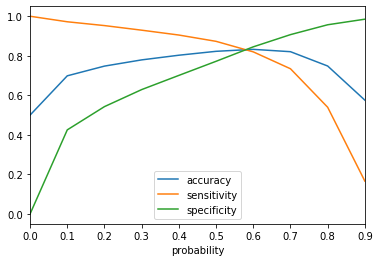

In [195]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

So we can see that the accuracy is almost stable at 0.6 probability but sensitivy is goes down from here.

***As we are concentrating more on the specificity, we are going to choose 0.5 as the cutoff as at this point specificity is higher.***

In [196]:
# Creating a column with name "predicted", which is the predicted value for 0.5 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.759963,0,1,1,1,1,1,1,1,1,0,0,1
1,0,0.214850,1,1,1,1,0,0,0,0,0,0,0,0
2,0,0.706761,2,1,1,1,1,1,1,1,1,0,0,1
3,0,0.002685,3,1,0,0,0,0,0,0,0,0,0,0
4,0,0.632835,4,1,1,1,1,1,1,1,0,0,0,1


In [197]:
# Printing scores
display_scores(y_train_pred_final["churn"], y_train_pred_final["predicted"])

Accuracy Score: 82.26%
Sensitivity/Recall Score: 87.3%
Specificity score: 77.21%
Precision Score: 79.3%
Confusion Matrix: 
 [[17051  5033]
 [ 2804 19280]]


The sensitivity is 87% in train data set.

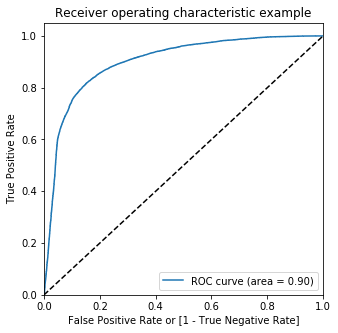

In [198]:
# Plotting ROC AUC curve on train data
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

#### Prediction on the test data and evaluating the model on the test set

In [199]:
# Taking a copy of the test set
X_test_log = X_test.copy()

In [200]:
# Taking only the columns, which are selected in the train set after removing insignificant and multicollinear variables
X_test_log = X_test_log[log_cols]

In [201]:
# Adding constant on the test set
X_test_sm = sm.add_constant(X_test_log)

In [202]:
# Predict on the test set
y_test_pred = log_no_pca_6.predict(X_test_sm)

In [203]:
y_test_pred.head()

mobile_number
7000912554    0.744890
7000409110    0.577672
7000903241    0.019811
7001270385    0.559821
7000931357    0.953672
dtype: float64

In [204]:
# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
mobile_number,
7000912554,0.744890
7000409110,0.577672
7000903241,0.019811
7001270385,0.559821
7000931357,0.953672


In [205]:
# Convetting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
mobile_number,
7000912554,1
7000409110,1
7000903241,0
7001270385,0
7000931357,1


In [206]:
# Appending y_pred and y_test_df
y_test_pred_final = pd.concat([y_test_df, y_pred], axis=1)

In [209]:
y_test_pred_final.head()

,churn,0
mobile_number,,
7000912554,1,0.744890
7000409110,1,0.577672
7000903241,0,0.019811
7001270385,0,0.559821
7000931357,1,0.953672


In [211]:
# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})
y_test_pred_final.head()

,churn,churn_prob
mobile_number,,
7000912554,1,0.744890
7000409110,1,0.577672
7000903241,0,0.019811
7001270385,0,0.559821
7000931357,1,0.953672


In [212]:
# In the test set using probablity cutoff 0.5, what we got in the train set 
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)

In [213]:
y_test_pred_final.head()

,churn,churn_prob,test_predicted
mobile_number,,,
7000912554,1,0.744890,1
7000409110,1,0.577672,1
7000903241,0,0.019811,0
7001270385,0,0.559821,1
7000931357,1,0.953672,1


#### Test Scores

In [214]:
# Printing scores
display_scores(y_test_pred_final['churn'], y_test_pred_final['test_predicted'])

Accuracy Score: 78.32%
Sensitivity/Recall Score: 84.57%
Specificity score: 77.72%
Precision Score: 26.68%
Confusion Matrix: 
 [[4256 1220]
 [  81  444]]


Sensitivity on the test data is 85%. Also the accuracy is 78%. However we are concentarting on the specificity as we need to predict churns accurately. This model can predict 85% of the churn amoung the actual churn accurately.

# 8. Feature Importance and Business recommandation

#### Top features that helped to achive 85% sensitivity

In [229]:
# Prining all the important features in a data frame in descending order based on their coefficient value
# log_no_pca_6.params[1:] selecting from 1 as 0 index is for constant.
pd.DataFrame(log_no_pca_6.params[1:], columns = ["coef"]).sort_values(by="coef", ascending = False)

,coef
onnet_mou_7,0.361170
monthly_3g_6,-0.219272
std_og_t2m_mou_8,-0.238761
std_og_t2t_mou_8,-0.501404
total_rech_data_8,-0.728525
sep_vbc_3g,-0.772702
monthly_2g_8,-0.876879
total_ic_mou_6,-1.062417
loc_og_mou_8,-1.082815
total_ic_diff,-1.419942


So we can see `onnet_mou_7` has only positive coefficient and all other featuers have negative coefficient. This means when onnet call usage of the Month July increases, the churn probability is also increases. Other than that all other variables have opposite effect on churn. For example `monthly_3g_6` feature, if the 3g usage on month June goes down, the probability of churn goes up. 

**Recomandations**

- Target those customers whos incoming usage has been reduced on August than average usage of JUne and July.
- Target and attract those customers offers whos total data recharge is going down on month August.
- Target those whos local outgoing on month August has been reducing.
- Target those whos total incoming usage is reducing in month June.
- Target those whose monthly 2g recharge is going down in August.
- Target those whos std outgoing calls to same operator/other operator usages are going down on August.
- Traget those customers whos volume based costs are going down for september.
- Target those customers whose onnet usage of month July is increasing. **In EDA section we have seen that onnet usage and offnet usage are positively correlated. So, if onnet increase that means offnet usages also get increased and maybe people are moving to other network. However, hypothesis needs further analysis.**

#### Visualisation of few important features

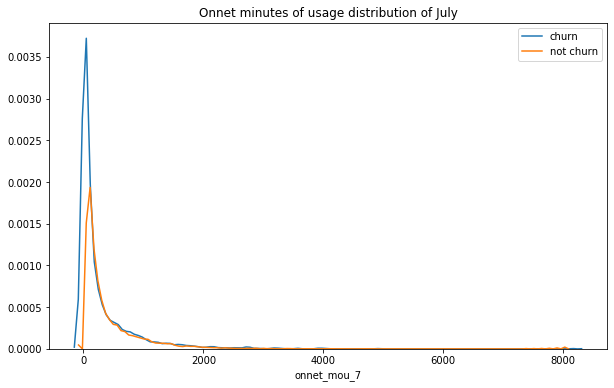

In [235]:
# Plotting onnet_mou_7 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(churn_df['onnet_mou_7'],label='churn',hist=False)
sns.distplot(non_churn_df['onnet_mou_7'],label='not churn',hist=False)
plt.title("Onnet minutes of usage distribution of July")
plt.show()

We can see more concentration of churns near 0 for onnet minutes of usage.

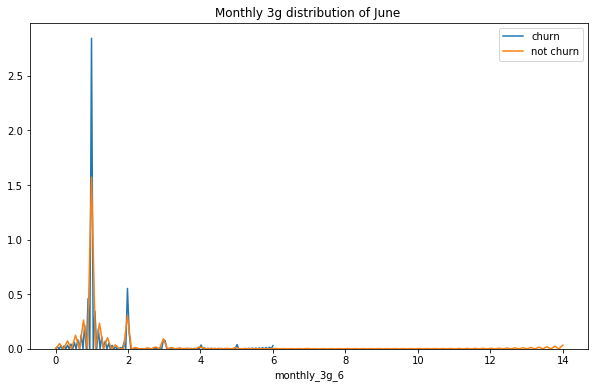

In [236]:
# Plotting monthly_3g_6 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(churn_df['monthly_3g_6'],label='churn',hist=False)
sns.distplot(non_churn_df['monthly_3g_6'],label='not churn',hist=False)
plt.title("Monthly 3g distribution of June ")
plt.show()

We can see more churns between 0 and 2 and the highest in in 1. So we can target those how has monthly 3g as 1 on June.

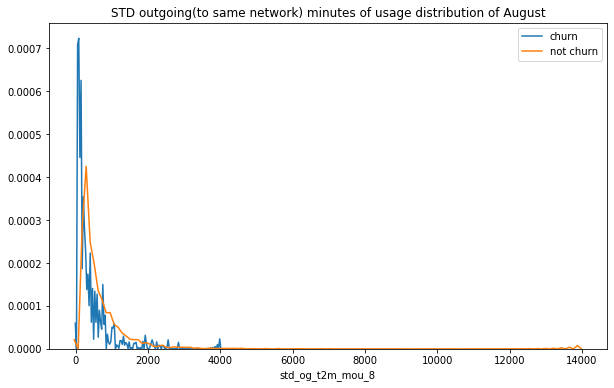

In [238]:
# Plotting loc_ic_mou_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(churn_df['std_og_t2m_mou_8'],label='churn',hist=False)
sns.distplot(non_churn_df['std_og_t2m_mou_8'],label='not churn',hist=False)
plt.title("STD outgoing(to same network) minutes of usage distribution of August")
plt.show()

We can see more concentration near lower region for the churn data. We can target those people who has STD outgoing minutes of usage below 1500 min.